In [1]:
!pip install --upgrade pingouin

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
from math import pi
from matplotlib.gridspec import GridSpec
from dateutil.relativedelta import *
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import scipy.stats
import pingouin as pg

In [3]:
# COMMON VARIABLES

alg_to_analyze = [
    'sentilexpt_sentiment_analysis_score',
    'sentilexpt_sentiment_analysis_polarity'
]

tpd_columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]

clean_df_columns = [
    'text',
    'final_score',
    'final_polarity',
    'oplexicon_sentiment_analysis_score',
    'oplexicon_sentiment_analysis_polarity',
    'sentistrength_sentiment_analysis_score',
    'sentistrength_sentiment_analysis_polarity',
    'vader_sentiment_analysis_score',
    'vader_sentiment_analysis_polarity'
]

In [4]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py'

Starting script...
Removing existing file...
Ending script...


In [5]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')
data.head()

26                       27  \
id_str_twitter                23781146                 15148309   
name                      Fe Rebelatto      Sommelier de Airbnb   
screen_name                  rebelatto                Guilh_rm_   
location        Rio de Janeiro, Brasil      somewhere in Brazil   
url                               None  https://t.co/gX4oRZWHg3   

                                     28                                   29  \
id_str_twitter       927028057763995648                             77648005   
name                          ✪ Felippe  Conference Distinguished Specialist   
screen_name              FelippeRegazio                              NannoKa   
location                                                      Ctba-PR Brasil   
url             https://t.co/KkaPlVH4Wu              https://t.co/hDni4Fh2Ng   

                                     30                        31  \
id_str_twitter               3429765093                  10794662   
name                      Paula Santana  Maharaja of the Legacies   
screen_name                  psanrosa13                    rponte   
location                         Brasil             Ceará, Brazil   
url             https://t.co/YJQuDtv2YW   https://t.co/3yZ94QNQvs   

                                     32                             33  \
id_str_twitter      1034514325644431361                      529445600   
name                            Jessica  var nickname = "Riquettinha";   
screen_name                   dev_jessi                    Riquettinha   
location             São Paulo - Brasil         Belo Horizonte, Brasil   
url             https://t.co/MtUeSEBICu        https://t.co/QU71LJgSuD   

                               34                       35  \
id_str_twitter           12050562                 62314491   
name            Roberta Arcoverde                 Gabriela   
screen_name                  rla4          Gabrielathalita   
location        Sao Paulo, Brazil           Belo Horizonte   
url                          None  https://t.co/AmkOKWlftK   

                                     36                       37  \
id_str_twitter                 18289937                172880784   
name                    Thamara Andrade              felipe.ts ⚡   
screen_name                      thamyk            felipefialho_   
location        Belo Horizonte, Brazil.    Dark Side of the Moon   
url             https://t.co/JWBzdmQOcV  https://t.co/yPuEuh1bn9   

                                     38  
id_str_twitter                 18609547  
name                         Juan Lopes  
screen_name                  juanplopes  
location         Rio de Janeiro, Brasil  
url             https://t.co/Uhw9rEUK2v

In [6]:
def clean_df(df):
    for c in clean_df_columns:
        del df[c]

In [7]:
def create_tweets_pd(data, id_user):

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    del tweets_pd[0]
    del tweets_pd[1]
    del tweets_pd[4]
    del tweets_pd[5]
    del tweets_pd[6]
    del tweets_pd[18]
    
    tweets_pd.columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]
 
    return tweets_pd

In [8]:
def create_line_plot(df_result, id_user):
    df_result["created_at"] = pd.to_datetime(df_result["created_at"])
    df_result['date_minus_time'] = df_result["created_at"].apply( lambda df_result : datetime.datetime(year=df_result.year, month=df_result.month, day=df_result.day))
    df_result.set_index(df_result["date_minus_time"],inplace=True)

    new_df = pd.DataFrame(df_result[alg_to_analyze[0]].resample('W').mean())

    new_df['week'] = range(1, len(new_df.index) + 1)

    x = new_df["week"]
    y = new_df[alg_to_analyze[0]]

    tickvalues = range(0, int(len(x)), 2)

    if len(tickvalues) > len(x[1::2]):
        tickvalues = range(0, int(len(x)) - (len(tickvalues) - len(x[1::2])), 2)

    fig = plt.figure(figsize=(16,6))

    plt.xticks(ticks = tickvalues ,labels = x[1::2], rotation = 'vertical')

    plt.title("Tweets Sentilexpt polarity per week - Participant {}".format(id_user))
    plt.ylabel("Polarity")
    plt.xlabel("Weeks")

    plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*0.05, max_ylim*0.12, 'Mean: {:.2f}'.format(y.mean()))

    plt.plot(x,y)

In [9]:
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    
#     create_line_plot(tweets_pd, id_user)

In [10]:
# DATA CONSIDERING THE NEUTRAL POLARITY

df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
            'mean' : []
          }

for c in data:
    id_user = c
    print('id_user: {}'.format(id_user))
    print('lexicon: Sentilexpt')
    tweets_pd = create_tweets_pd(data, id_user)
    vader_df = tweets_pd[['id_user', alg_to_analyze[0], alg_to_analyze[1]]].copy()
    print('mean: {}'.format(vader_df[alg_to_analyze[0]].mean()))
    qtd_pos = vader_df.query(alg_to_analyze[1] + ' == "pos"')['id_user'].count()
    qtd_neu = vader_df.query(alg_to_analyze[1] + ' == "neu"')['id_user'].count()
    qtd_neg = vader_df.query(alg_to_analyze[1] + ' == "neg"')['id_user'].count()
    qtd_total = vader_df[alg_to_analyze[1]].count()
    print('pos: {}'.format(qtd_pos))
    print('neu: {}'.format(qtd_neu))
    print('neg: {}'.format(qtd_neg))
    print('% pos: {}'.format((qtd_pos / qtd_total) * 100))
    print('% neu: {}'.format((qtd_neu / qtd_total) * 100))
    print('% neg: {}'.format((qtd_neg / qtd_total) * 100))
    print('')
    df_dict['id_user'].append(id_user)
    df_dict['pos'].append(qtd_pos)
    df_dict['neu'].append(qtd_neu)
    df_dict['neg'].append(qtd_neg)
    df_dict['por_pos'].append((qtd_pos / qtd_total) * 100)
    df_dict['por_neu'].append((qtd_neu / qtd_total) * 100)
    df_dict['por_neg'].append((qtd_neg / qtd_total) * 100)
    df_dict['mean'].append(vader_df[alg_to_analyze[0]].mean())

df_chart = pd.DataFrame(df_dict)
df_chart
    

id_user: 26
lexicon: Sentilexpt
mean: -0.016055009089104982
pos: 1200
neu: 2476
neg: 1363
% pos: 23.814248858900573
% neu: 49.136733478864855
% neg: 27.04901766223457

id_user: 27
lexicon: Sentilexpt
mean: 0.004248512301604738
pos: 1158
neu: 2406
neg: 985
% pos: 25.456144207518133
% neu: 52.89074521872939
% neg: 21.653110573752475

id_user: 28
lexicon: Sentilexpt
mean: -0.01582306871734369
pos: 1538
neu: 2742
neg: 1653
% pos: 25.92280465194674
% neu: 46.21607955503118
% neg: 27.86111579302208

id_user: 29
lexicon: Sentilexpt
mean: -0.002688394953717535
pos: 907
neu: 1590
neg: 852
% pos: 27.082711257091667
% neu: 47.47685876381009
% neg: 25.44042997909824

id_user: 30
lexicon: Sentilexpt
mean: 0.11187166677490562
pos: 1547
neu: 1084
neg: 541
% pos: 48.77049180327869
% neu: 34.17402269861286
% neg: 17.05548549810845

id_user: 31
lexicon: Sentilexpt
mean: 0.03964145385590424
pos: 2501
neu: 1948
neg: 1547
% pos: 41.71114076050701
% neu: 32.48832555036691
% neg: 25.80053368912608

id_user: 

id_user   pos   neu   neg    por_pos    por_neu    por_neg      mean
0        26  1200  2476  1363  23.814249  49.136733  27.049018 -0.016055
1        27  1158  2406   985  25.456144  52.890745  21.653111  0.004249
2        28  1538  2742  1653  25.922805  46.216080  27.861116 -0.015823
3        29   907  1590   852  27.082711  47.476859  25.440430 -0.002688
4        30  1547  1084   541  48.770492  34.174023  17.055485  0.111872
5        31  2501  1948  1547  41.711141  32.488326  25.800534  0.039641
6        32  3609  3644  1921  39.339438  39.720951  20.939612  0.054171
7        33   526   875   930  22.565423  37.537538  39.897040 -0.077845
8        34   562   664   319  36.375405  42.977346  20.647249  0.051674
9        35   777  1262   556  29.942197  48.631985  21.425819  0.034614
10       36    99   256   113  21.153846  54.700855  24.145299 -0.013526
11       37  2566  2596  1294  39.745973  40.210657  20.043371  0.052329
12       38  1243  1981  1484  26.401869  42.077315  31.520816 -0.020748

In [11]:
# DATA WITHOUT THE NEUTRAL POLARITY

df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
            'mean_all' : [],
            'mean_posneg' : []
          }

for c in data:
    id_user = c
    print('id_user: {}'.format(id_user))
    print('lexicon: Sentilexpt')
    tweets_pd = create_tweets_pd(data, id_user)
    vader_df = tweets_pd[['id_user', alg_to_analyze[0], alg_to_analyze[1]]].copy()
    final_score = vader_df.query(alg_to_analyze[1] + ' == "pos"')[alg_to_analyze[0]].tolist()
    final_score.extend(vader_df.query(alg_to_analyze[1] + ' == "neg"')[alg_to_analyze[0]].tolist())
    print(len(final_score))
    print(statistics.mean(final_score))
    print('mean: {}'.format(vader_df[alg_to_analyze[0]].mean()))
    qtd_pos = vader_df.query(alg_to_analyze[1] + ' == "pos"')['id_user'].count()
    qtd_neu = vader_df.query(alg_to_analyze[1] + ' == "neu"')['id_user'].count()
    qtd_neg = vader_df.query(alg_to_analyze[1] + ' == "neg"')['id_user'].count()
    qtd_total = vader_df[alg_to_analyze[1]].count()
    print('pos: {}'.format(qtd_pos))
    print('neu: {}'.format(qtd_neu))
    print('neg: {}'.format(qtd_neg))
    print('% pos: {}'.format((qtd_pos / qtd_total) * 100))
    print('% neu: {}'.format((qtd_neu / qtd_total) * 100))
    print('% neg: {}'.format((qtd_neg / qtd_total) * 100))
    print('')
    df_dict['id_user'].append(id_user)
    df_dict['pos'].append(qtd_pos)
    df_dict['neu'].append(qtd_neu)
    df_dict['neg'].append(qtd_neg)
    df_dict['por_pos'].append((qtd_pos / qtd_total) * 100)
    df_dict['por_neu'].append((qtd_neu / qtd_total) * 100)
    df_dict['por_neg'].append((qtd_neg / qtd_total) * 100)
    df_dict['mean_all'].append(vader_df[alg_to_analyze[0]].mean())
    df_dict['mean_posneg'].append(statistics.mean(final_score))

df_chart = pd.DataFrame(df_dict)
df_chart
    

id_user: 26
lexicon: Sentilexpt
2563
-0.03156503737807257
mean: -0.016055009089104982
pos: 1200
neu: 2476
neg: 1363
% pos: 23.814248858900573
% neu: 49.136733478864855
% neg: 27.04901766223457

id_user: 27
lexicon: Sentilexpt
2143
0.009018423919738686
mean: 0.004248512301604738
pos: 1158
neu: 2406
neg: 985
% pos: 25.456144207518133
% neu: 52.89074521872939
% neg: 21.653110573752475

id_user: 28
lexicon: Sentilexpt
3191
-0.02941970125352554
mean: -0.01582306871734369
pos: 1538
neu: 2742
neg: 1653
% pos: 25.92280465194674
% neu: 46.21607955503118
% neg: 27.86111579302208

id_user: 29
lexicon: Sentilexpt
1759
-0.0051184961341671385
mean: -0.002688394953717535
pos: 907
neu: 1590
neg: 852
% pos: 27.082711257091667
% neu: 47.47685876381009
% neg: 25.44042997909824

id_user: 30
lexicon: Sentilexpt
2088
0.16995063554118775
mean: 0.11187166677490562
pos: 1547
neu: 1084
neg: 541
% pos: 48.77049180327869
% neu: 34.17402269861286
% neg: 17.05548549810845

id_user: 31
lexicon: Sentilexpt
4048
0.058

id_user   pos   neu   neg    por_pos    por_neu    por_neg  mean_all  \
0        26  1200  2476  1363  23.814249  49.136733  27.049018 -0.016055   
1        27  1158  2406   985  25.456144  52.890745  21.653111  0.004249   
2        28  1538  2742  1653  25.922805  46.216080  27.861116 -0.015823   
3        29   907  1590   852  27.082711  47.476859  25.440430 -0.002688   
4        30  1547  1084   541  48.770492  34.174023  17.055485  0.111872   
5        31  2501  1948  1547  41.711141  32.488326  25.800534  0.039641   
6        32  3609  3644  1921  39.339438  39.720951  20.939612  0.054171   
7        33   526   875   930  22.565423  37.537538  39.897040 -0.077845   
8        34   562   664   319  36.375405  42.977346  20.647249  0.051674   
9        35   777  1262   556  29.942197  48.631985  21.425819  0.034614   
10       36    99   256   113  21.153846  54.700855  24.145299 -0.013526   
11       37  2566  2596  1294  39.745973  40.210657  20.043371  0.052329   
12       38  1243  1981  1484  26.401869  42.077315  31.520816 -0.020748   

    mean_posneg  
0     -0.031565  
1      0.009018  
2     -0.029420  
3     -0.005118  
4      0.169951  
5      0.058718  
6      0.089868  
7     -0.124627  
8      0.090621  
9      0.067384  
10    -0.029859  
11     0.087523  
12    -0.035820

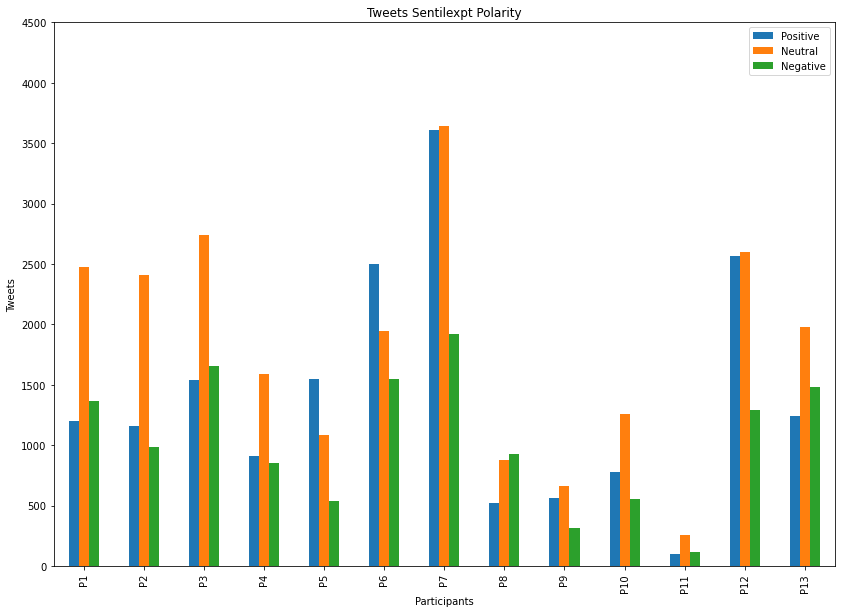

In [12]:
# multiple bar plots

bar_chart_data = []

y_range = range(0,4501, 500)

for i in df_chart.index:
    d = ['P{}'.format(i+1), df_chart.iloc[i]['pos'], df_chart.iloc[i]['neu'], df_chart.iloc[i]['neg']]
    bar_chart_data.append(d)

df = pd.DataFrame(bar_chart_data, columns=["Participant","pos","neu","neg"])
df.plot(yticks = y_range, x="Participant", y=["pos", "neu", "neg"], kind="bar",figsize=(14,10))

plt.legend(["Positive", "Neutral", "Negative"])
plt.title('Tweets Sentilexpt Polarity')
plt.xlabel('Participants')
plt.ylabel('Tweets')

plt.show()

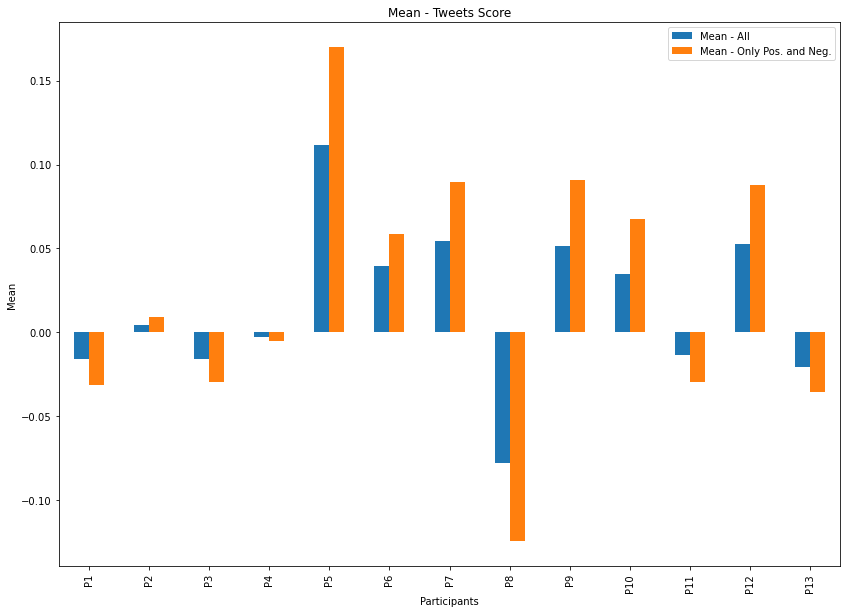

In [13]:
# multiple bar plots with means

bar_chart_data = []

y_range = range(-1,1)

for i in df_chart.index:
    d = ['P{}'.format(i+1), df_chart.iloc[i]['mean_all'], df_chart.iloc[i]['mean_posneg']]
    bar_chart_data.append(d)

df = pd.DataFrame(bar_chart_data, columns=["Participant","mean_all","mean_posneg"])
df.plot(x="Participant", y=["mean_all", "mean_posneg"], kind="bar",figsize=(14,10))

plt.legend(["Mean - All", "Mean - Only Pos. and Neg."])
plt.title('Mean - Tweets Score')
plt.xlabel('Participants')
plt.ylabel('Mean')

plt.show()

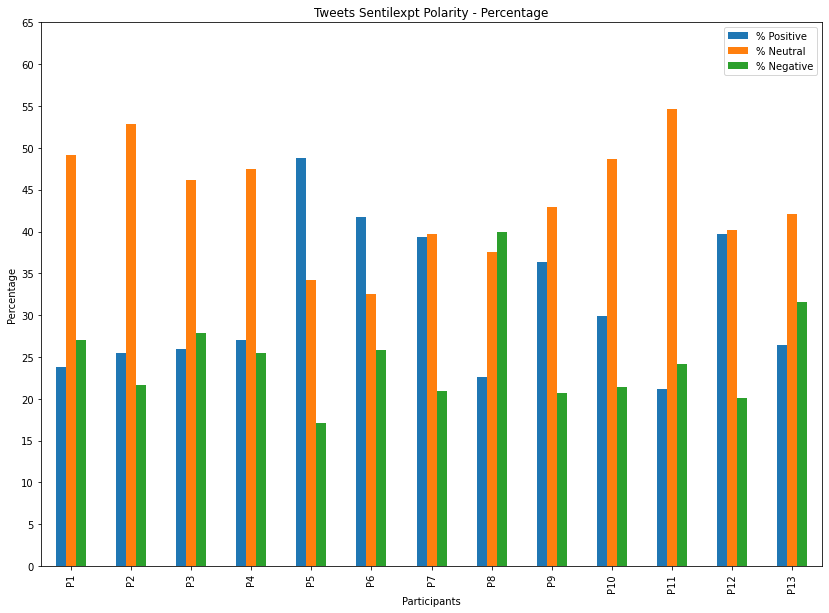

In [14]:
# multiple line plots

bar_chart_data = []

y_range = range(0, 70, 5)

for i in df_chart.index:
    d = ['P{}'.format(i+1), df_chart.iloc[i]['por_pos'], df_chart.iloc[i]['por_neu'], df_chart.iloc[i]['por_neg']]
    bar_chart_data.append(d)

df = pd.DataFrame(bar_chart_data, columns=["Participant","por_pos","por_neu","por_neg"])
df.plot(yticks = y_range, x="Participant", y=["por_pos", "por_neu", "por_neg"], kind="bar",figsize=(14,10))


plt.legend(['% Positive', '% Neutral', '% Negative'])
plt.title('Tweets Sentilexpt Polarity - Percentage')
plt.xlabel('Participants')
plt.ylabel('Percentage')

plt.show()

In [15]:
bigfive = {}

for c in data:
    id_user = c

    df_bf = pd.DataFrame(data[id_user]['bigfive'])
    
    if df_bf.empty == False:
        id = int(df_bf[6])

        del df_bf[0]
        del df_bf[6]

        df_bf.columns = ['O', 'C', 'E', 'A', 'N']

        bigfive[id] = df_bf

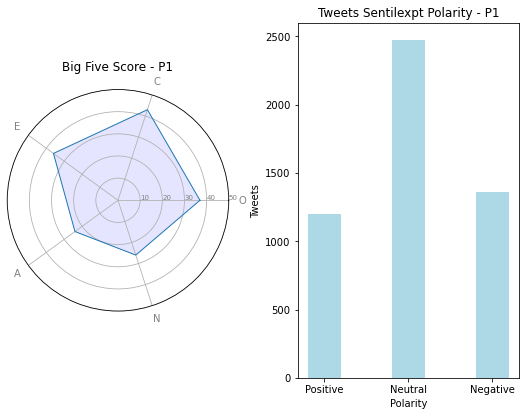

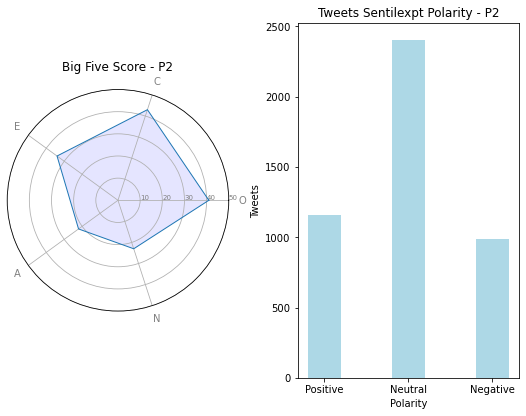

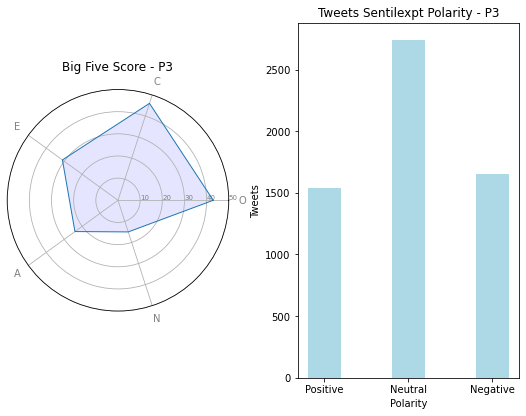

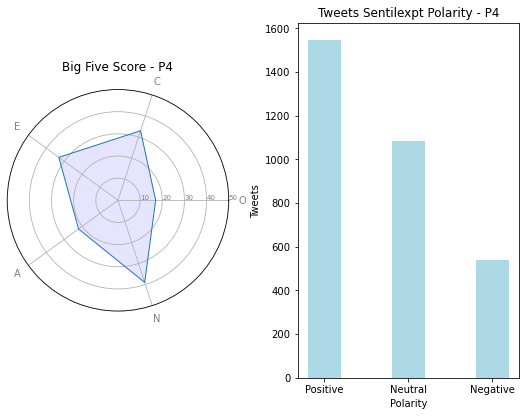

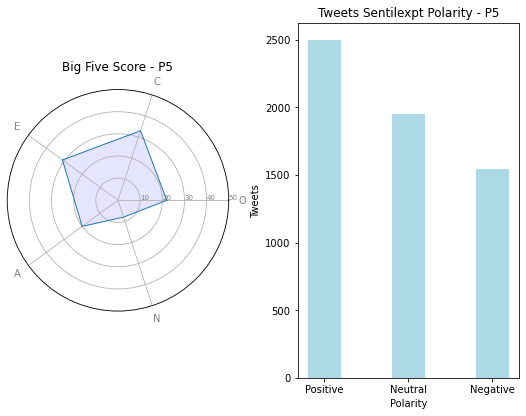

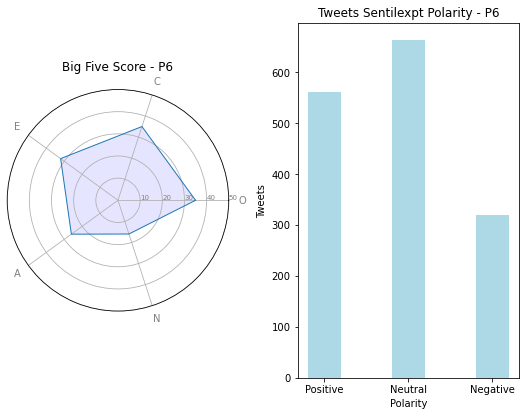

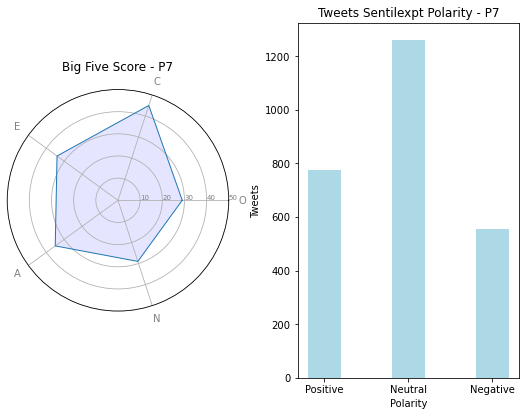

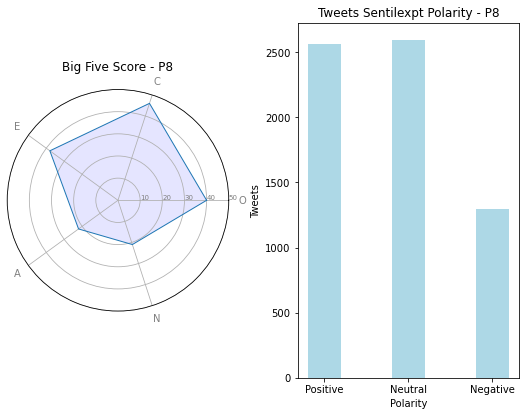

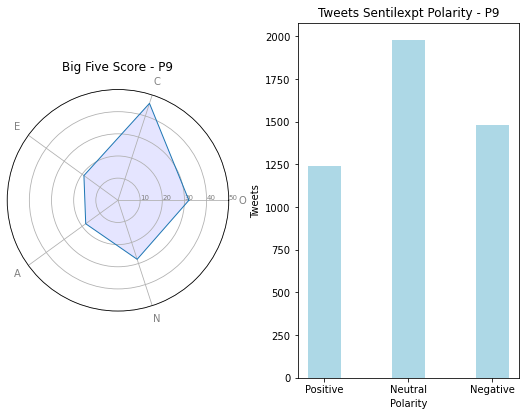

In [16]:
count = 1

for i in bigfive:
    b = bigfive[i]

    o = [b['O']]
    c = [b['C']]
    e = [b['E']]
    a = [b['A']]
    n = [b['N']]

    # Set data
    df = pd.DataFrame({
    'group': ['A'],
    'O': o,
    'C': c,
    'E': e,
    'A': a,
    'N': n
    })

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    
    fig = plt.figure(figsize=(8, 6))
    gs = GridSpec(nrows=1, ncols=2)
    
    # Initialise the spider plot
    ax = fig.add_subplot(gs[0, 0])
    ax = plt.subplot(121, polar=True)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=10)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30, 40, 50], ["10","20","30", '40', '50'], color="grey", size=7)
    plt.ylim(0,50)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title('Big Five Score - P{}'.format(count))
    
#     plt.tight_layout()

    # Show the graph
#     plt.show()
    
    plt.subplot(122)
    
    y_range = range(0,6001, 500)

    d = {"Positive": int(df_chart.query('id_user == {}'.format(i))['pos']), 
         "Neutral": int(df_chart.query('id_user == {}'.format(i))['neu']), 
         "Negative": int(df_chart.query('id_user == {}'.format(i))['neg'])}
    
#     plt.figure(figsize = (8, 6))

    plt.tight_layout(pad=2.8)
#     plt.subplot_tool()
 
    # creating the bar plot
    plt.bar(d.keys(), d.values(), width = 0.4, color = 'lightblue')

    plt.title('Tweets Sentilexpt Polarity - P{}'.format(count))
    plt.xlabel('Polarity')
    plt.ylabel('Tweets')

    plt.show()
    
    count += 1

In [17]:
df_chart

id_user   pos   neu   neg    por_pos    por_neu    por_neg  mean_all  \
0        26  1200  2476  1363  23.814249  49.136733  27.049018 -0.016055   
1        27  1158  2406   985  25.456144  52.890745  21.653111  0.004249   
2        28  1538  2742  1653  25.922805  46.216080  27.861116 -0.015823   
3        29   907  1590   852  27.082711  47.476859  25.440430 -0.002688   
4        30  1547  1084   541  48.770492  34.174023  17.055485  0.111872   
5        31  2501  1948  1547  41.711141  32.488326  25.800534  0.039641   
6        32  3609  3644  1921  39.339438  39.720951  20.939612  0.054171   
7        33   526   875   930  22.565423  37.537538  39.897040 -0.077845   
8        34   562   664   319  36.375405  42.977346  20.647249  0.051674   
9        35   777  1262   556  29.942197  48.631985  21.425819  0.034614   
10       36    99   256   113  21.153846  54.700855  24.145299 -0.013526   
11       37  2566  2596  1294  39.745973  40.210657  20.043371  0.052329   
12       38  1243  1981  1484  26.401869  42.077315  31.520816 -0.020748   

    mean_posneg  
0     -0.031565  
1      0.009018  
2     -0.029420  
3     -0.005118  
4      0.169951  
5      0.058718  
6      0.089868  
7     -0.124627  
8      0.090621  
9      0.067384  
10    -0.029859  
11     0.087523  
12    -0.035820

[Text(1, 0, 'Positive'), Text(2, 0, 'Negative'), Text(3, 0, 'Neutral')]

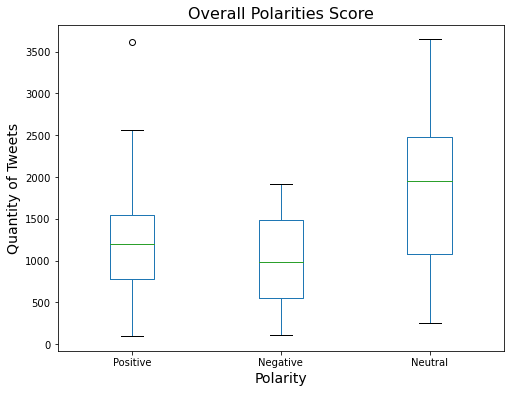

In [18]:
bplot = df_chart.boxplot(column=['pos', 'neg', 'neu'], grid=False, figsize=(8,6))

bplot.axes.set_title("Overall Polarities Score", fontsize=16)
 
bplot.set_xlabel("Polarity", fontsize=14) 
bplot.set_ylabel("Quantity of Tweets", fontsize=14)
bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['Positive', 'Negative', 'Neutral'])

[Text(1, 0, 'Positive (%)'),
 Text(2, 0, 'Negative (%)'),
 Text(3, 0, 'Neutral (%)')]

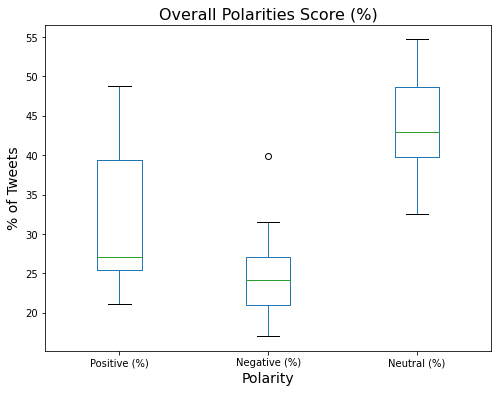

In [19]:
bplot = df_chart.boxplot(column=['por_pos', 'por_neg', 'por_neu'], grid=False, figsize=(8,6))

bplot.axes.set_title("Overall Polarities Score (%)", fontsize=16)
 
bplot.set_xlabel("Polarity", fontsize=14) 
bplot.set_ylabel("% of Tweets", fontsize=14)
bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['Positive (%)', 'Negative (%)', 'Neutral (%)'])

[Text(1, 0, 'All Polarities'), Text(2, 0, 'Only Positives and Negatives')]

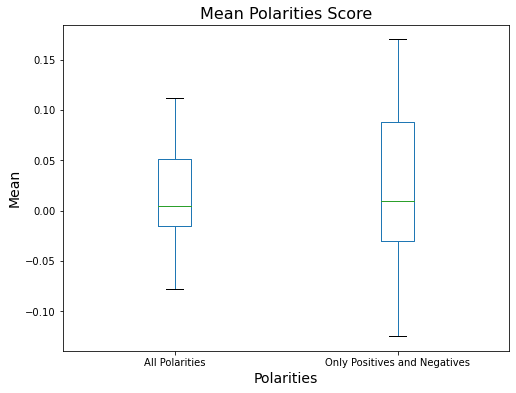

In [20]:
bplot = df_chart.boxplot(column=['mean_all', 'mean_posneg'], grid=False, figsize=(8,6))

bplot.axes.set_title("Mean Polarities Score", fontsize=16)
 
bplot.set_xlabel("Polarities", fontsize=14) 
bplot.set_ylabel("Mean", fontsize=14)
bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['All Polarities', 'Only Positives and Negatives'])

In [21]:
def plot_point_chart(df, count, id_user):

    first_date = df.iloc[0]['date_minus_time']
    
    for i in range(1,13):
        end_date = first_date + relativedelta(months=+3)
        mask = (df['created_at'] >= first_date) & (df['created_at'] < end_date)
        new_df = df.loc[mask]
        
        fig, ax = plt.subplots(figsize=(24, 8))
    
        x = new_df['date_minus_time']
        y = new_df[alg_to_analyze[0]]

        x_ticks = x

        colors = {'pos':'green', 'neu':'orange', 'neg':'red'}

        plt.yticks(np.arange(-1.0, 1.1, 0.1), fontsize=16)
        plt.xticks(x_ticks, rotation='vertical', fontsize=16)

        date_form = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_form)
        plt.xlabel('Day', fontsize=16)
        plt.ylabel('Polarity Sentilexpt Score', fontsize=16)
        
        plt.title('Scatter Plot - Sentilexpt - P{}, User {} - From {} To {}'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")), fontsize=20)
        
        plt.rcParams.update({
            "savefig.facecolor": (1.0, 1.0, 1.0)
        })
        
#         plt.legend()

        plt.scatter(x, y, alpha=0.7, c=new_df[alg_to_analyze[1]].map(colors))
        
#         plt.savefig('images/scatter_P{}_U{}_{}_{}.pdf'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")),bbox_inches='tight',transparent=False)
        
        first_date = end_date

In [22]:
count = 1
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    df = pd.DataFrame(tweets_pd)
    clean_df(df)
    
    df = df.sort_values(by='created_at')
    
    df["created_at"] = pd.to_datetime(df["created_at"])
    df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
#     df.set_index(df["date_minus_time"],inplace=True)
    
#     plot_point_chart(df, count, id_user)
    
    count += 1

In [23]:
tweets_pd = create_tweets_pd(data, id_user)
df = pd.DataFrame(tweets_pd)
df.head()

text           created_at  \
0  @mauriciojr Eu usei bastante Eclipse e acho o ...  2021-03-31T23:11:12   
1  Piada a parte, parece um sanduíche meio ruim m...  2021-03-31T20:35:20   
2  Tava querendo um sanduíche, mas acho que esse ...  2021-03-31T20:27:23   
3  O ícone do Slack no Mac mudou de forma tão sut...  2021-03-31T15:03:38   
4  @rochacbruno Caraca, eu tô viciado nessa músic...  2021-03-30T20:39:03   

   id_user  vader_sentiment_analysis_score vader_sentiment_analysis_polarity  \
0       38                          0.7096                               pos   
1       38                         -0.3612                               neg   
2       38                         -0.8807                               neg   
3       38                         -0.4767                               neg   
4       38                          0.2182                               pos   

   oplexicon_sentiment_analysis_score oplexicon_sentiment_analysis_polarity  \
0                            0.250000                                   pos   
1                           -0.250000                                   neg   
2                            0.458831                                   pos   
3                            0.000000                                   neu   
4                           -0.458831                                   neg   

   sentistrength_sentiment_analysis_score  \
0                                0.458831   
1                                0.000000   
2                               -0.250000   
3                               -0.250000   
4                                0.000000   

  sentistrength_sentiment_analysis_polarity  \
0                                       pos   
1                                       neu   
2                                       neg   
3                                       neg   
4                                       neu   

   sentilexpt_sentiment_analysis_score sentilexpt_sentiment_analysis_polarity  \
0                             0.000000                                    neu   
1                            -0.458831                                    neg   
2                             0.000000                                    neu   
3                             0.000000                                    neu   
4                            -0.250000                                    neg   

   final_score final_polarity  
0     0.354608            pos  
1    -0.267508            neg  
2    -0.167967            neg  
3    -0.181675            neg  
4    -0.122658            neg

In [24]:
def plot_point_chart_pos_neg(df, count, id_user):

    first_date = df.index[0]
    
    for i in range(1,13):
        
        fig, ax = plt.subplots(figsize=(24, 8))

        end_date = first_date + relativedelta(months=+3)
        mask = (df.index >= first_date) & (df.index < end_date)
        new_df = df.loc[mask]
        
        x_ticks = new_df.index

        plt.xticks(x_ticks, rotation='vertical', fontsize=16)
        plt.yticks(np.arange(-1.0, 1.1, 0.1), fontsize=16)
        plt.xlabel('Day', fontsize=16)
        plt.ylabel('Polarity Score Mean', fontsize=16)

        date_form = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_form)
    
        x = new_df.index
        y1 = new_df['sentilexpt_score_pos']
        y2 = new_df['sentilexpt_score_neg']
        y3 = new_df['mean']

        plt.title('Scatter Plot - Polarity Means - Sentilexpt - P{}, User {} - From {} To {}'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")), fontsize=20)
        
        plt.rcParams.update({
            "savefig.facecolor": (1.0, 1.0, 1.0)
        })
        
        plt.axhline(y=0.0, color='orange', linestyle='-', alpha=0.7, linewidth=4)
        
#         # plotting the line 1 points 
#         plt.scatter(new_df.index, new_df['final_score_pos'], label = "pos", marker='o', color = 'green')

#         # plotting the line 2 points 
#         plt.scatter(new_df.index, new_df['final_score_neg'], label = "neg", marker='o', color = 'red')
        
        
        # plotting the line 1 points 
        plt.plot(new_df.index, new_df['sentilexpt_score_pos'], label = "pos", marker='o', markerfacecolor='none', color = 'green')

        # plotting the line 2 points 
        plt.plot(new_df.index, new_df['sentilexpt_score_neg'], label = "neg", marker='o', markerfacecolor='none', color = 'red')
        
        # plotting the line 3 points 
        plt.plot(new_df.index, new_df['mean'], label = "mean", marker='o', markerfacecolor='none', color = 'gray', linestyle='--')
        
        plt.legend()
        
#         plt.savefig('images/scatter_pol_means_P{}_U{}_{}_{}.pdf'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")),bbox_inches='tight',transparent=False)
        
        plt.show()
        
        first_date = end_date

In [25]:
count = 1
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    df = pd.DataFrame(tweets_pd)
    clean_df(df)
    
    df = df.sort_values(by='created_at')
    
    df["created_at"] = pd.to_datetime(df["created_at"])
    df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
    df.set_index(df["date_minus_time"],inplace=True)
    
    df_pos = df.query(alg_to_analyze[1] + " == 'pos'")
    df_pos = pd.DataFrame(df_pos[alg_to_analyze[0]].resample('D').mean())
    
    df_neg = df.query(alg_to_analyze[1] + " == 'neg'")
    df_neg = pd.DataFrame(df_neg[alg_to_analyze[0]].resample('D').mean())
    
    df_final = pd.merge(df_pos, df_neg, how="outer", on=["date_minus_time"])
    df_final = df_final.fillna(0)
    df_final.columns = ['sentilexpt_score_pos', 'sentilexpt_score_neg']
    
    df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)
    
#     plot_point_chart_pos_neg(df_final, count, id_user)
    
    count += 1

In [26]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

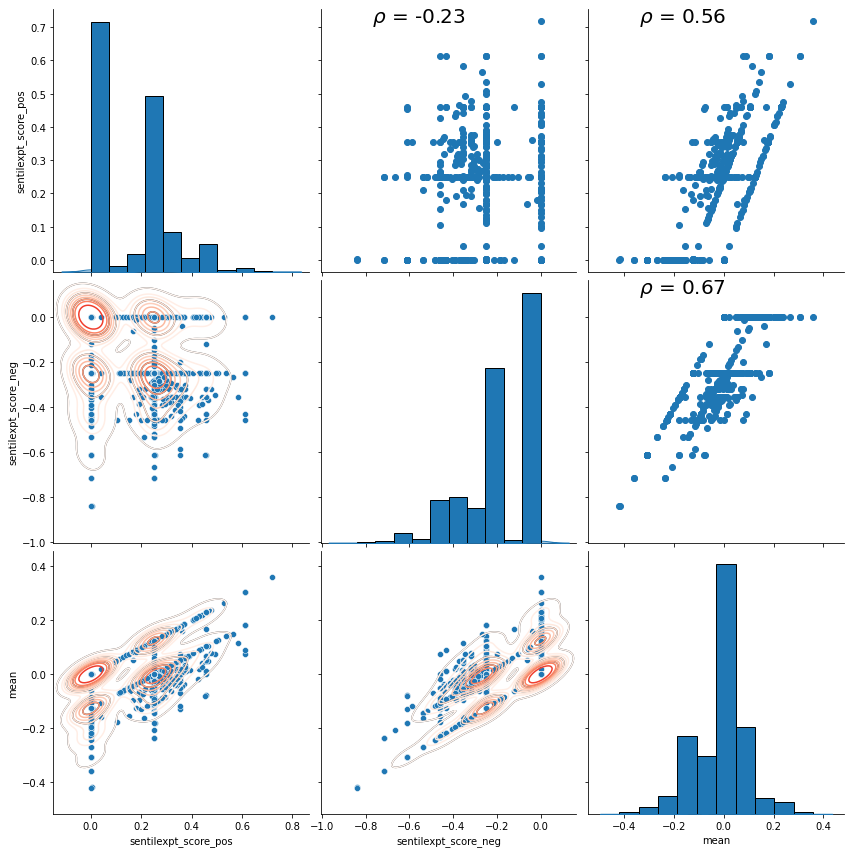

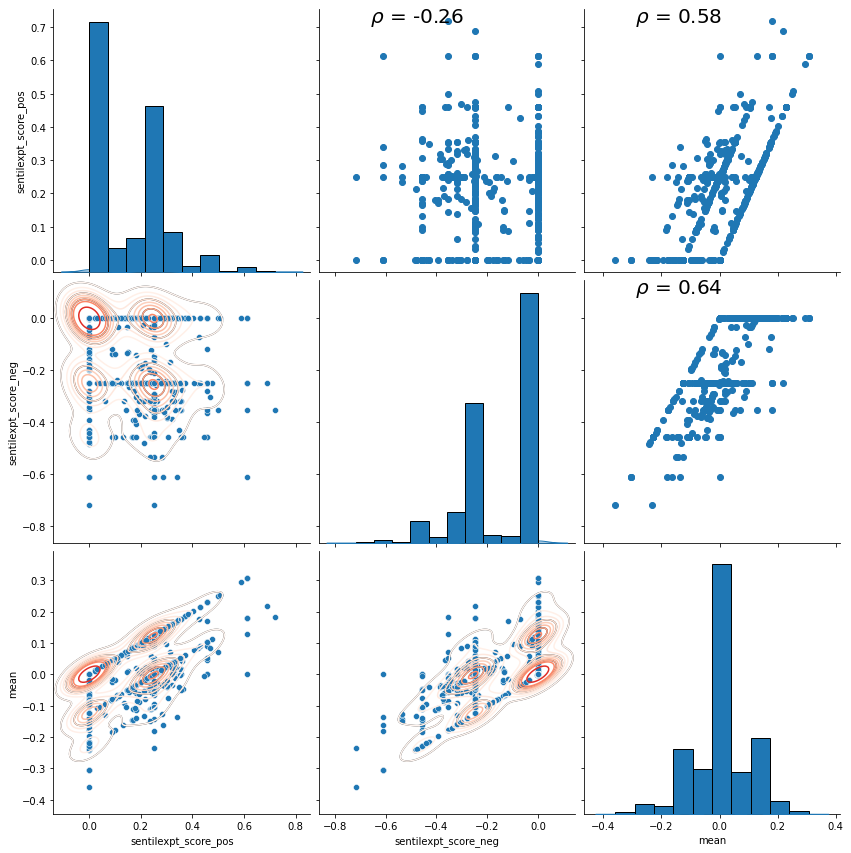

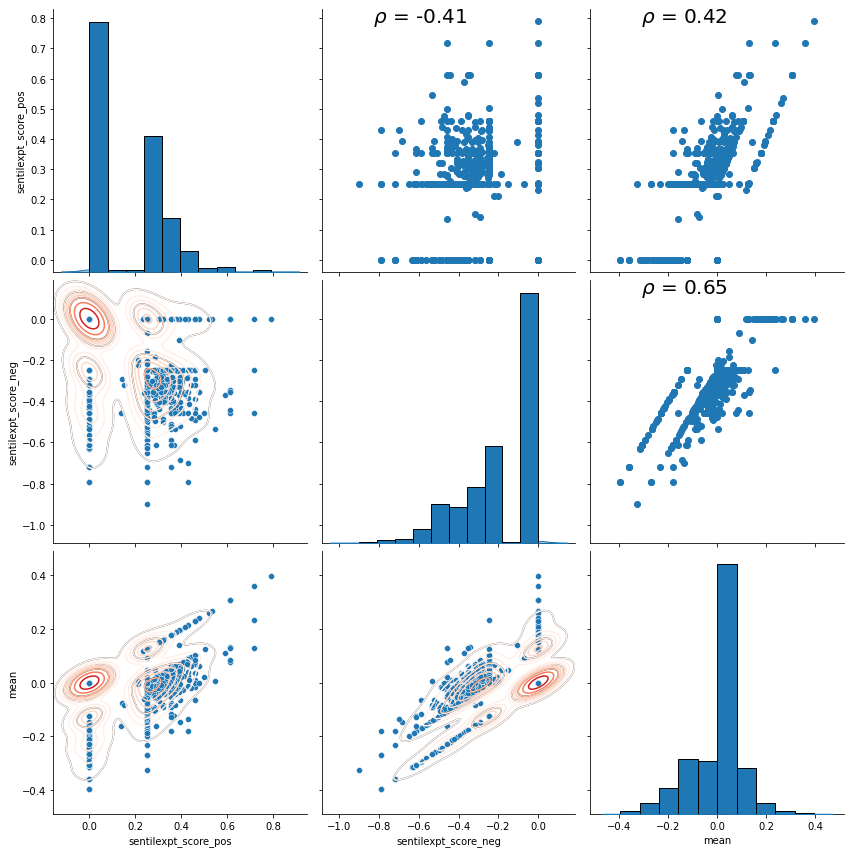

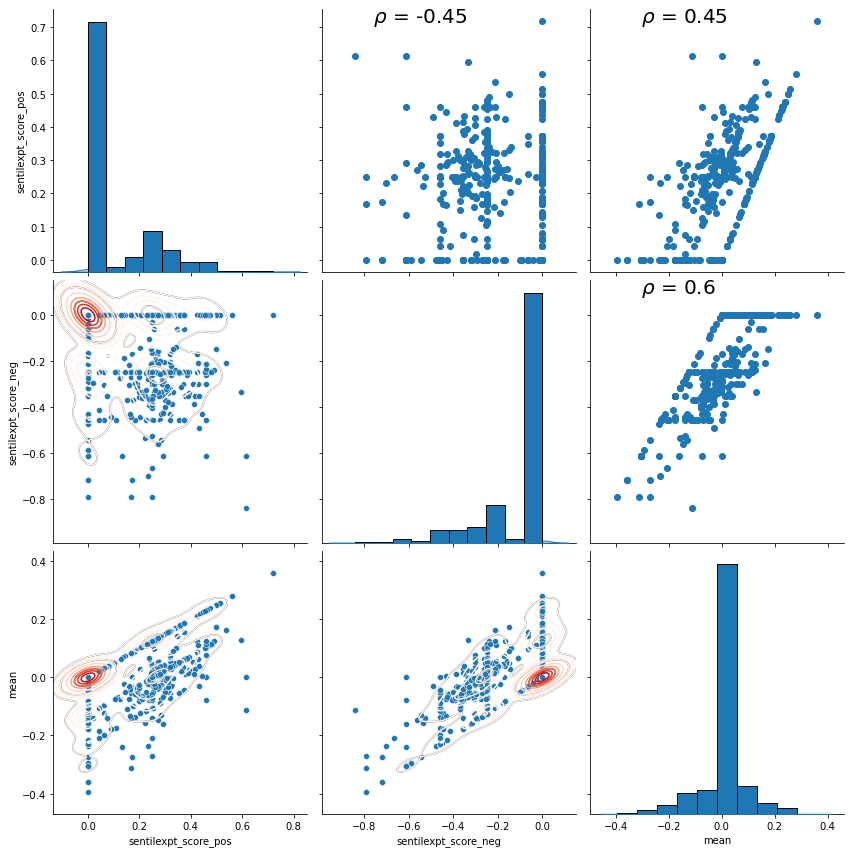

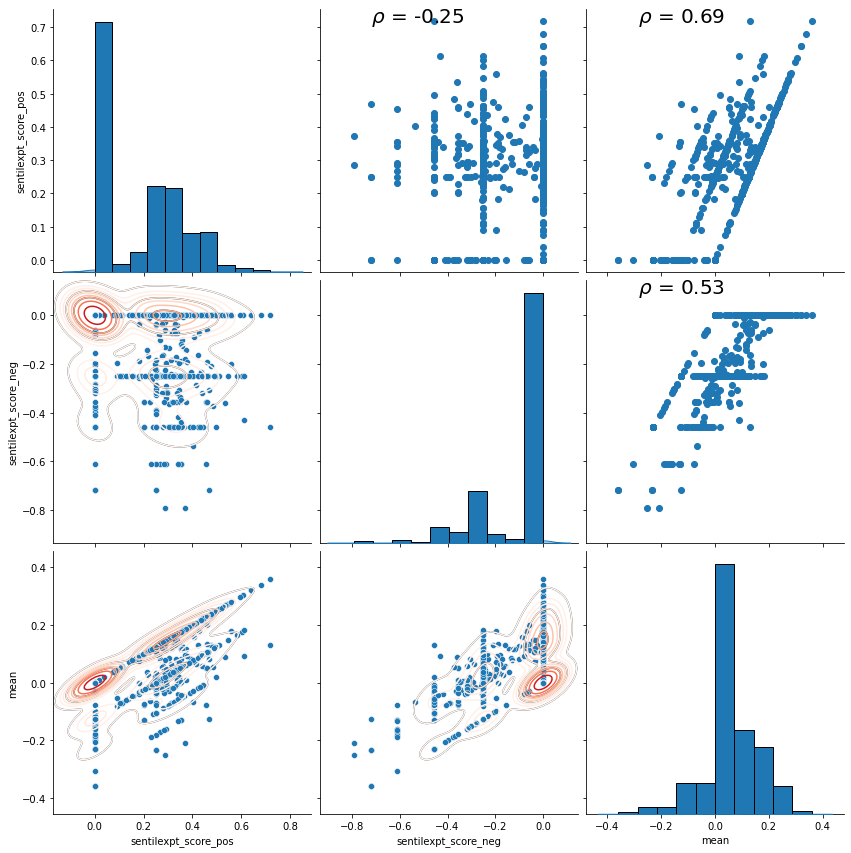

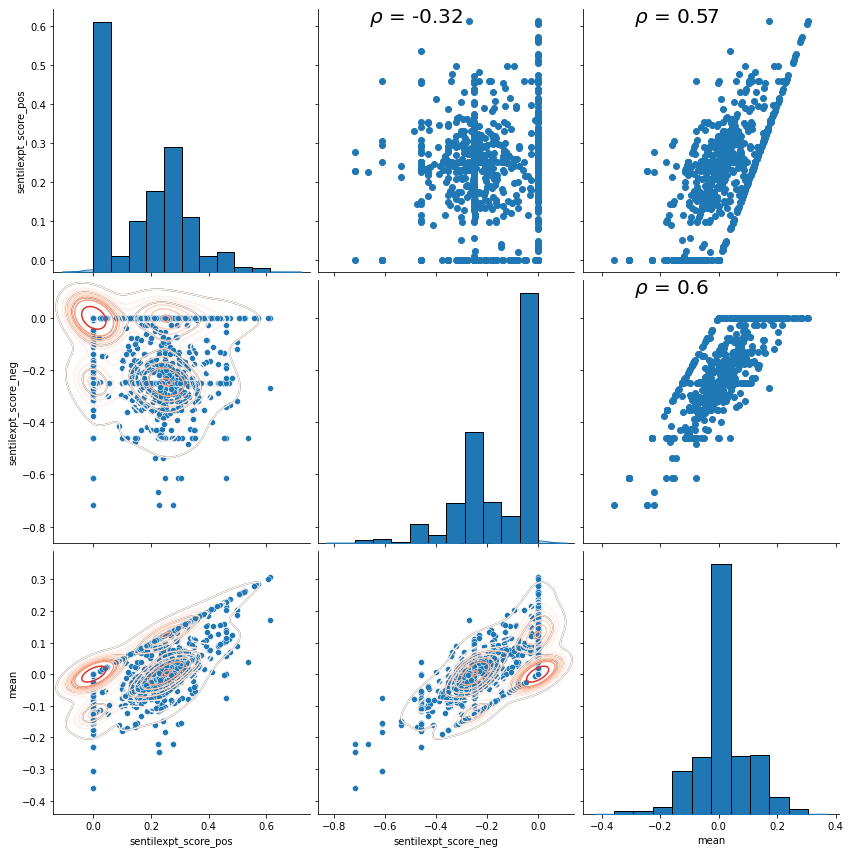

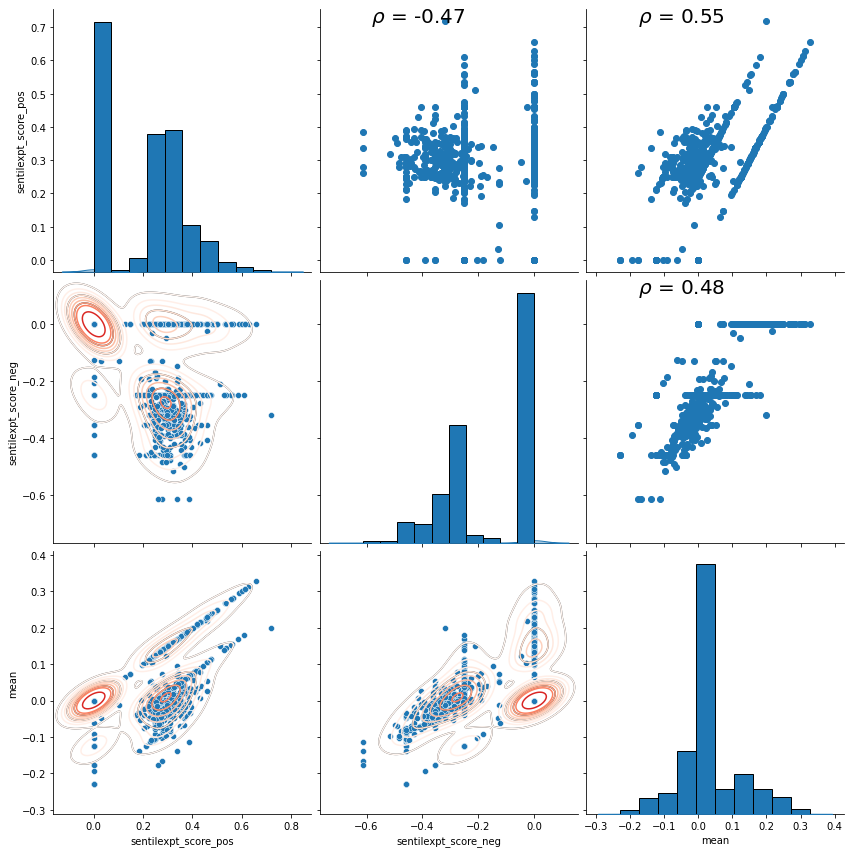

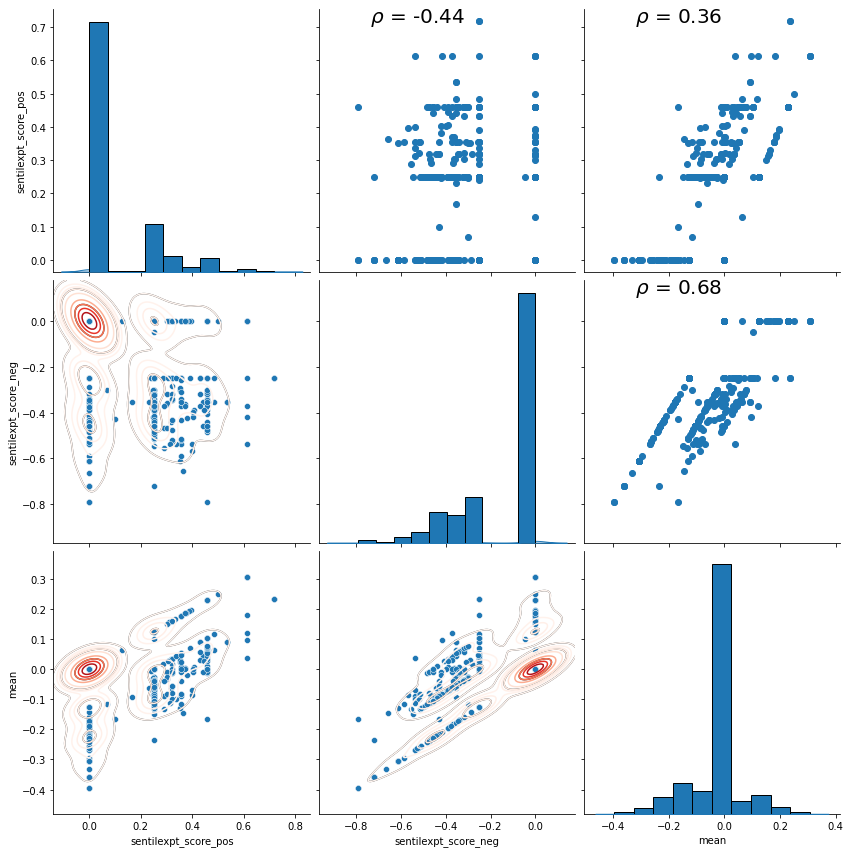

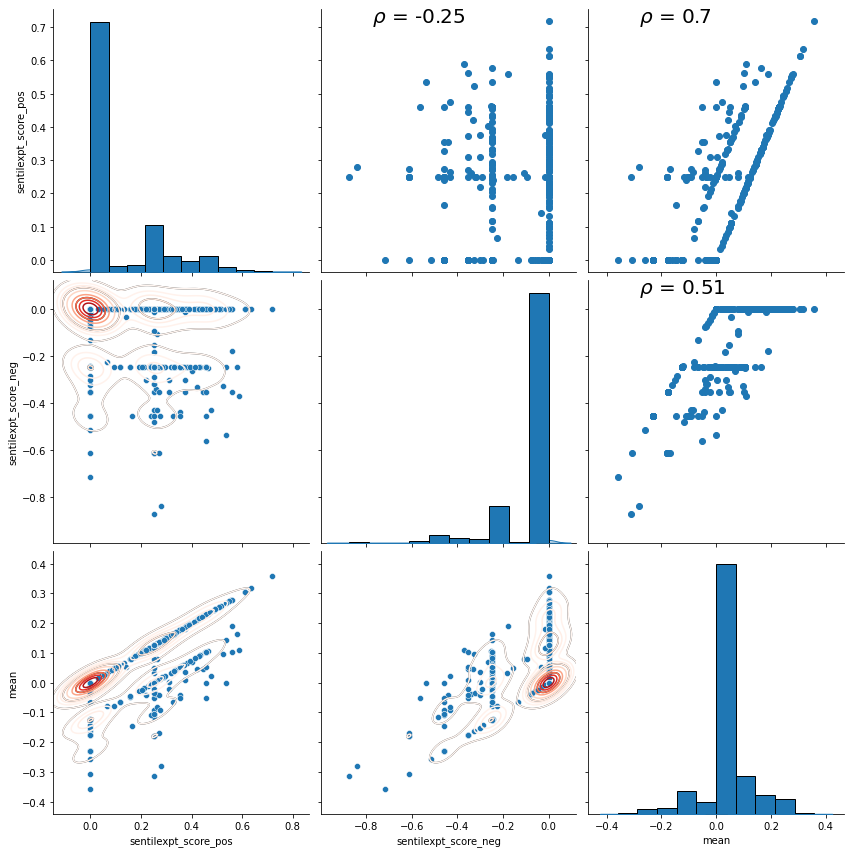

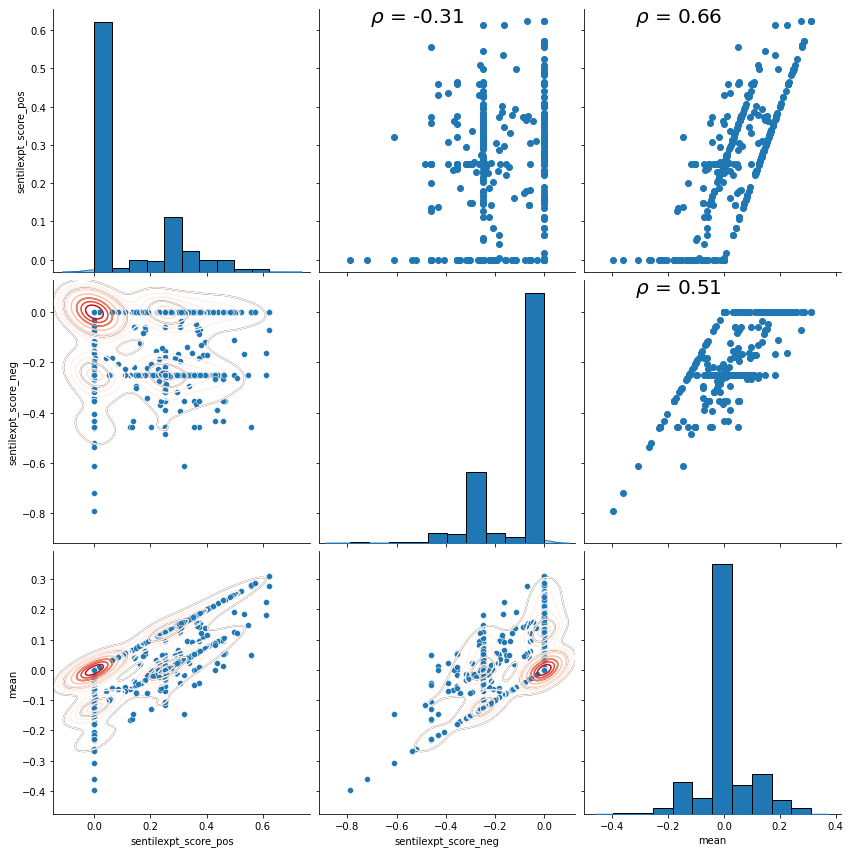

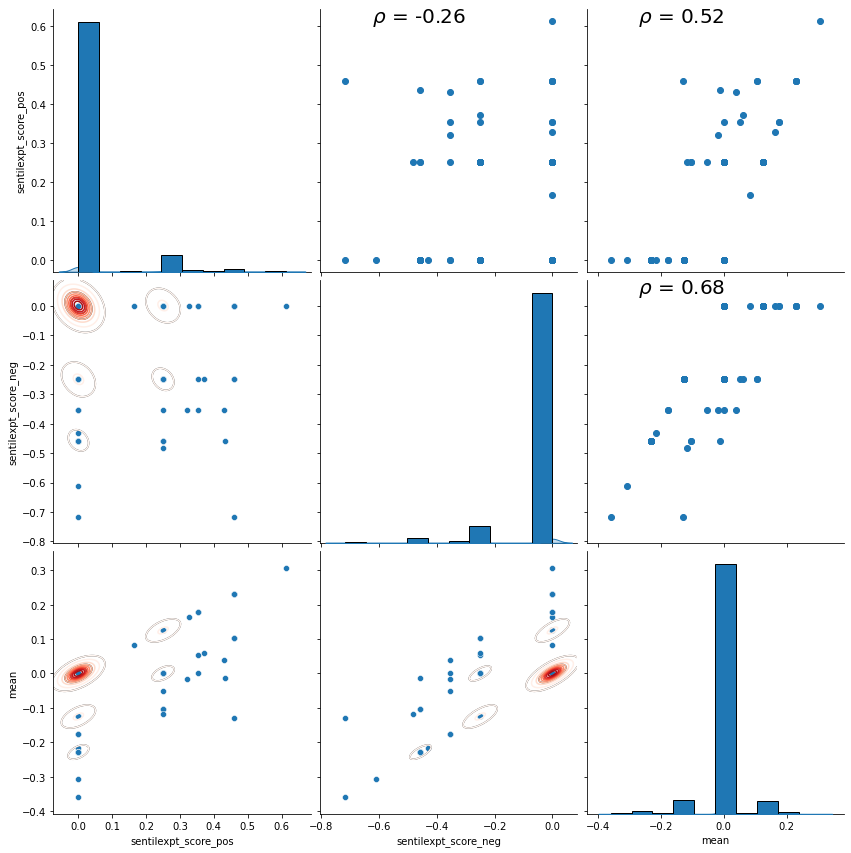

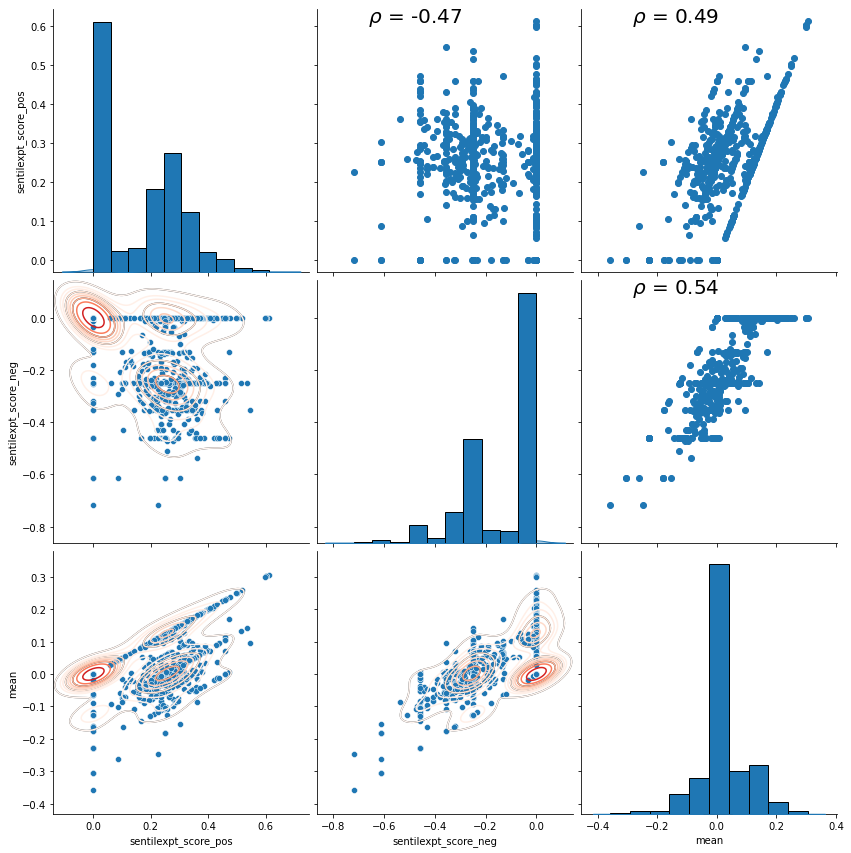

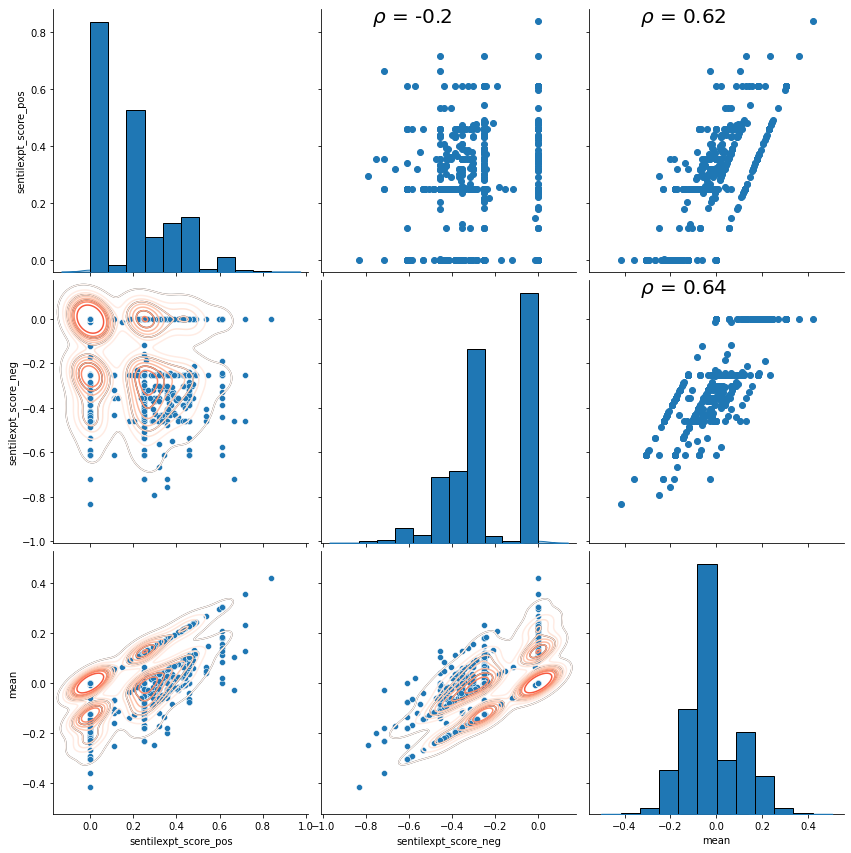

In [27]:
count = 1
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    df = pd.DataFrame(tweets_pd)
    
    clean_df(df)

    df = df.sort_values(by='created_at')

    df["created_at"] = pd.to_datetime(df["created_at"])
    df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
    df.set_index(df["date_minus_time"],inplace=True)

    df_pos = df.query(alg_to_analyze[1] + " == 'pos'")
    df_pos = pd.DataFrame(df_pos[alg_to_analyze[0]].resample('D').mean())

    df_neg = df.query(alg_to_analyze[1] + " == 'neg'")
    df_neg = pd.DataFrame(df_neg[alg_to_analyze[0]].resample('D').mean())

    df_final = pd.merge(df_pos, df_neg, how="outer", on=["date_minus_time"])
    df_final = df_final.fillna(0)
    df_final.columns = ['sentilexpt_score_pos', 'sentilexpt_score_neg']

    df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)

    g = sns.pairplot(df_final, diag_kind="kde", height=4)
    g.map_lower(sns.kdeplot, levels=4, color=".2")

    # Map the plots to the locations
    g = g.map_upper(plt.scatter)
    g = g.map_upper(corr)
    g = g.map_lower(sns.kdeplot, cmap = 'Reds')
    g = g.map_diag(plt.hist, bins = 10, edgecolor =  'k');
    
    count += 1

In [28]:
df_final

sentilexpt_score_pos  sentilexpt_score_neg      mean
date_minus_time                                                      
2018-04-01                   0.458831             -0.250000  0.104415
2018-04-02                   0.000000              0.000000  0.000000
2018-04-03                   0.612372             -0.612372  0.000000
2018-04-04                   0.250000             -0.354415 -0.052208
2018-04-05                   0.458831             -0.250000  0.104415
...                               ...                   ...       ...
2021-03-27                   0.000000             -0.250000 -0.125000
2021-03-28                   0.000000             -0.250000 -0.125000
2021-03-29                   0.000000             -0.250000 -0.125000
2021-03-30                   0.000000             -0.250000 -0.125000
2021-03-31                   0.000000             -0.458831 -0.229415

[1096 rows x 3 columns]

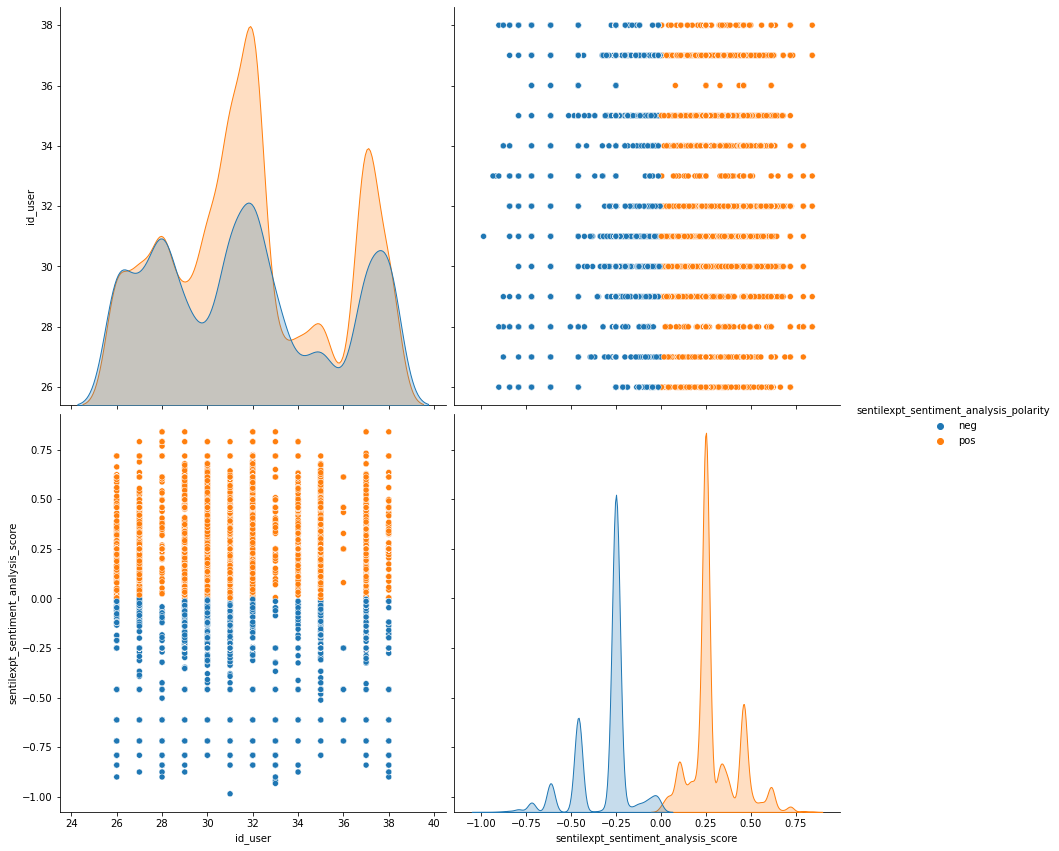

In [29]:
tweets = [data[d]['tweets'] for d in data]

final_tweets = []
for i in tweets:
    final_tweets.extend(i)

df = pd.DataFrame(final_tweets)

del df[0]
del df[1]
del df[4]
del df[5]
del df[6]
del df[18]

df.columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]

clean_df(df)

df = df.sort_values(by='created_at')

# print(df)

df["created_at"] = pd.to_datetime(df["created_at"])
df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
# df.set_index(df["date_minus_time"],inplace=True)

df_final = df.query(alg_to_analyze[1] + " == 'pos' or " + alg_to_analyze[1] + " == 'neg'")

# df_pos = pd.DataFrame(df_pos['final_score'].resample('D').mean())
# df_pos['final_score_mean'] = df_pos['final_score'].resample('D').mean()

# print(df_pos)


# df_neg = df.query("final_polarity == 'neg'")
# df_neg = pd.DataFrame(df_neg['final_score'].resample('D').mean())

# df_final = pd.merge(df_pos, df_neg, how="outer", on=["date_minus_time"])
# df_final = df_final.fillna(0)
# df_final.columns = ['final_score_pos', 'final_score_neg']

# df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)

# df_final.head()

sns.pairplot(df_final, diag_kind="kde", height=6, hue=alg_to_analyze[1])

Text(0.5, 1.02, 'PairPlot')

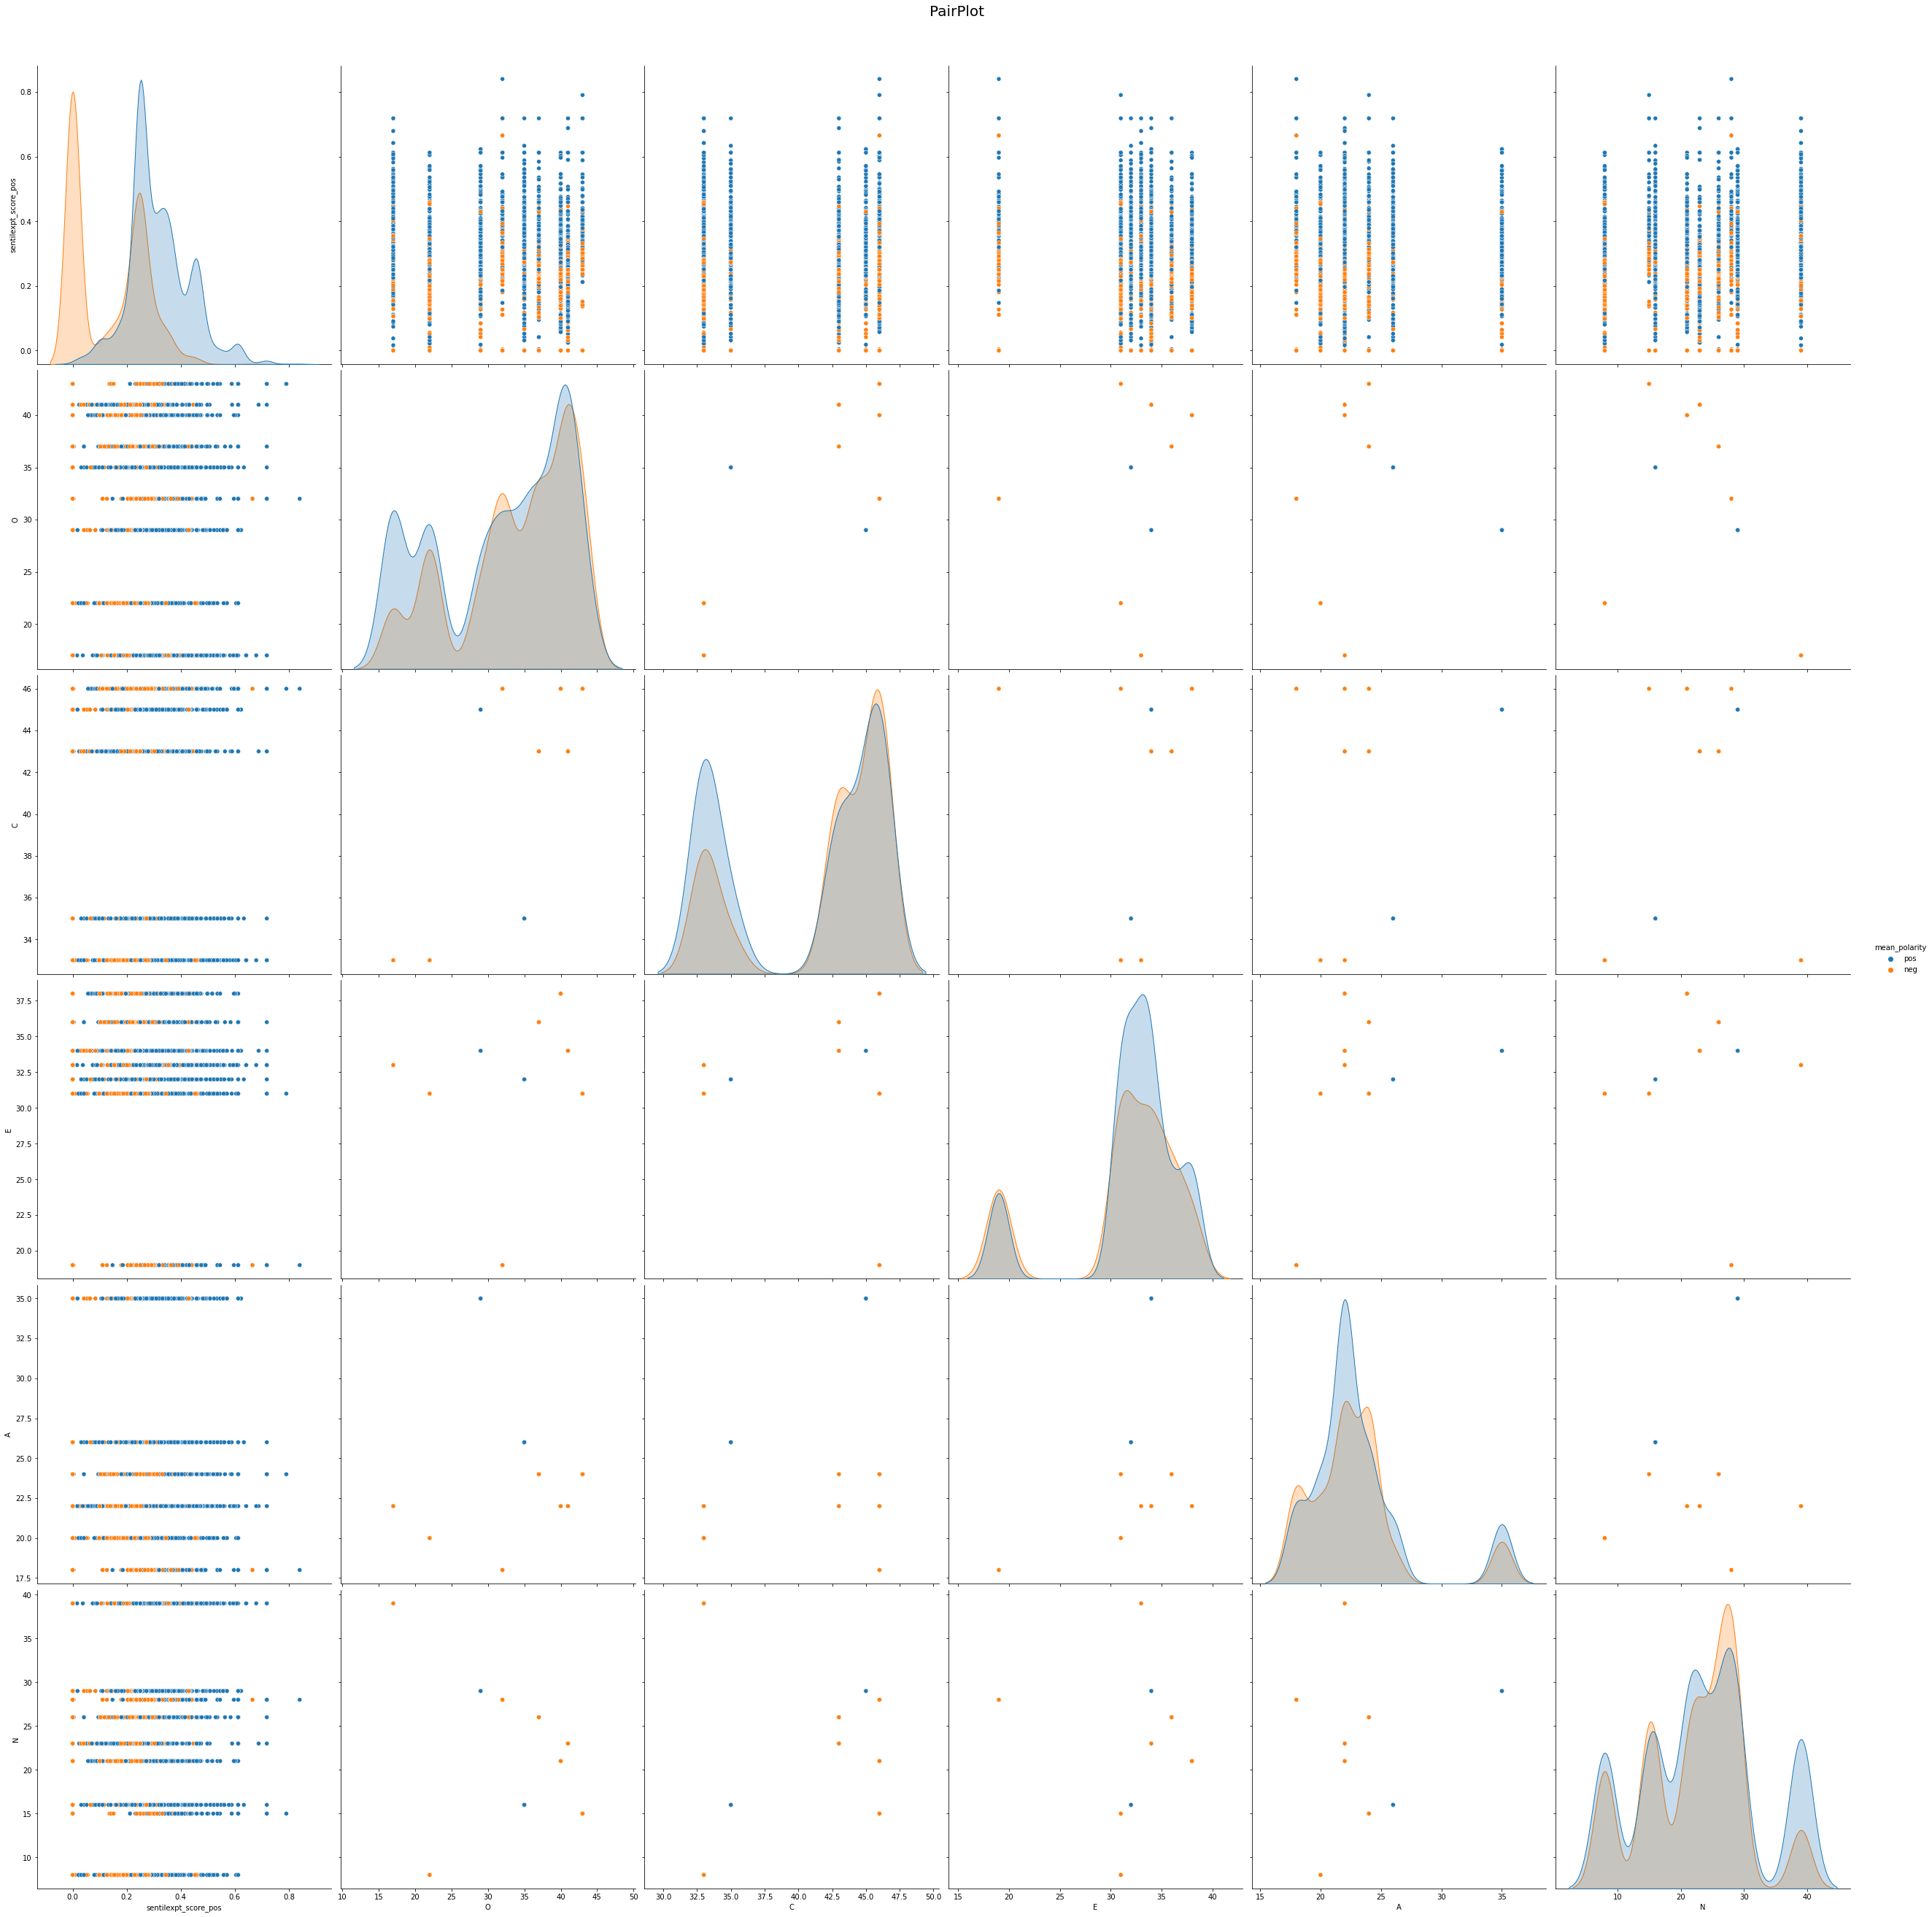

In [30]:
frames = []

count = 1
for c in data:
    id_user = c
    
    df_bf = pd.DataFrame(data[id_user]['bigfive'])
    
    if df_bf.empty == False:
        tweets_pd = create_tweets_pd(data, id_user)
        df = pd.DataFrame(tweets_pd)

        clean_df(df)

        df = df.sort_values(by='created_at')

        df["created_at"] = pd.to_datetime(df["created_at"])
        df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
        df.set_index(df["date_minus_time"],inplace=True)

        df_pos = df.query(alg_to_analyze[1] + " == 'pos'")

        df_pos = pd.DataFrame(df_pos[alg_to_analyze[0]].resample('D').mean())

        df_neg = df.query(alg_to_analyze[1] + " == 'neg'")
        df_neg = pd.DataFrame(df_neg[alg_to_analyze[0]].resample('D').mean())

        df_final = pd.merge(df_pos, df_neg, how="outer", on=["date_minus_time"])
        df_final = df_final.fillna(0)
        df_final.columns = ['sentilexpt_score_pos', 'sentilexpt_score_neg']

        df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)
        df_final.loc[df_final['mean'] > 0, ['mean_polarity']] = 'pos'
        df_final.loc[df_final['mean'] < 0, ['mean_polarity']] = 'neg'

    #     df_final = df_final.drop(df_final["mean_polarity"])
        df_final = df_final.dropna(how = 'any')

        df_final['id_user'] = id_user
        
        df_final['O'] = int(bigfive[id_user]['O'])
        df_final['C'] = int(bigfive[id_user]['C'])
        df_final['E'] = int(bigfive[id_user]['E'])
        df_final['A'] = int(bigfive[id_user]['A'])
        df_final['N'] = int(bigfive[id_user]['N'])

    #     g = sns.pairplot(df_final, diag_kind="kde", height=4)

        count += 1
        
        frames.append(df_final)

#         g = sns.pairplot(df_final, diag_kind="kde", height=6, hue="mean_polarity")
#         g.fig.suptitle("PairPlot - P{} - U{}".format(count, id_user), fontsize=20, y=1.02) # y= some height>1
    #     g.map_lower(sns.kdeplot, levels=4, color=".2")

    #     # Map the plots to the locations
    #     g = g.map_upper(plt.scatter)
    #     g = g.map_upper(corr)
    #     g = g.map_lower(sns.kdeplot)
    #     g = g.map_diag(plt.hist, bins = 10, edgecolor =  'k');

    
result = pd.concat(frames)

# print(result)

# print(result.loc[result['mean_polarity'] == 'neg'])

g = sns.pairplot(result, diag_kind="kde", height=6, hue="mean_polarity", vars=['sentilexpt_score_pos', 
                                                                            'O',
                                                                            'C',
                                                                            'E',
                                                                            'A',
                                                                            'N'
                                                                              ])
g.fig.suptitle("PairPlot", fontsize=20, y=1.02) # y= some height>1

In [31]:
ids = result['id_user'].unique()
bf = ['O', 'C', 'E', 'A', 'N']

for b in bf:
    df_chart[b] = 0

for i in ids:
    for b in bf:
        df_chart.loc[df_chart['id_user'] == i, b] = int(bigfive[i][b])
        
        
df_chart

id_user   pos   neu   neg    por_pos    por_neu    por_neg  mean_all  \
0        26  1200  2476  1363  23.814249  49.136733  27.049018 -0.016055   
1        27  1158  2406   985  25.456144  52.890745  21.653111  0.004249   
2        28  1538  2742  1653  25.922805  46.216080  27.861116 -0.015823   
3        29   907  1590   852  27.082711  47.476859  25.440430 -0.002688   
4        30  1547  1084   541  48.770492  34.174023  17.055485  0.111872   
5        31  2501  1948  1547  41.711141  32.488326  25.800534  0.039641   
6        32  3609  3644  1921  39.339438  39.720951  20.939612  0.054171   
7        33   526   875   930  22.565423  37.537538  39.897040 -0.077845   
8        34   562   664   319  36.375405  42.977346  20.647249  0.051674   
9        35   777  1262   556  29.942197  48.631985  21.425819  0.034614   
10       36    99   256   113  21.153846  54.700855  24.145299 -0.013526   
11       37  2566  2596  1294  39.745973  40.210657  20.043371  0.052329   
12       38  1243  1981  1484  26.401869  42.077315  31.520816 -0.020748   

    mean_posneg   O   C   E   A   N  
0     -0.031565  37  43  36  24  26  
1      0.009018  41  43  34  22  23  
2     -0.029420  43  46  31  24  15  
3     -0.005118   0   0   0   0   0  
4      0.169951  17  33  33  22  39  
5      0.058718  22  33  31  20   8  
6      0.089868   0   0   0   0   0  
7     -0.124627   0   0   0   0   0  
8      0.090621  35  35  32  26  16  
9      0.067384  29  45  34  35  29  
10    -0.029859   0   0   0   0   0  
11     0.087523  40  46  38  22  21  
12    -0.035820  32  46  19  18  28

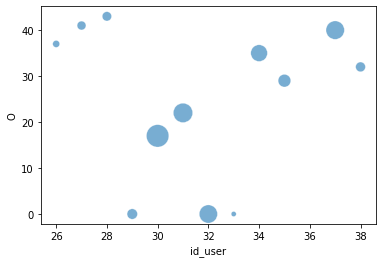

In [32]:

sns.scatterplot(data=df_chart, x="id_user", y="O", 
                size='por_pos', 
                legend=False, 
                sizes=(0, 500),
                cmap="Accent",
                alpha=0.6)


plt.show()

In [33]:
df_chart = df_chart.drop(df_chart[df_chart['O'] == 0].index)
df_chart

id_user   pos   neu   neg    por_pos    por_neu    por_neg  mean_all  \
0        26  1200  2476  1363  23.814249  49.136733  27.049018 -0.016055   
1        27  1158  2406   985  25.456144  52.890745  21.653111  0.004249   
2        28  1538  2742  1653  25.922805  46.216080  27.861116 -0.015823   
4        30  1547  1084   541  48.770492  34.174023  17.055485  0.111872   
5        31  2501  1948  1547  41.711141  32.488326  25.800534  0.039641   
8        34   562   664   319  36.375405  42.977346  20.647249  0.051674   
9        35   777  1262   556  29.942197  48.631985  21.425819  0.034614   
11       37  2566  2596  1294  39.745973  40.210657  20.043371  0.052329   
12       38  1243  1981  1484  26.401869  42.077315  31.520816 -0.020748   

    mean_posneg   O   C   E   A   N  
0     -0.031565  37  43  36  24  26  
1      0.009018  41  43  34  22  23  
2     -0.029420  43  46  31  24  15  
4      0.169951  17  33  33  22  39  
5      0.058718  22  33  31  20   8  
8      0.090621  35  35  32  26  16  
9      0.067384  29  45  34  35  29  
11     0.087523  40  46  38  22  21  
12    -0.035820  32  46  19  18  28

In [34]:
pos_list = df_chart['pos'].tolist()
o_list = df_chart['O'].tolist()
c_list = df_chart['C'].tolist()
e_list = df_chart['E'].tolist()
a_list = df_chart['A'].tolist()
n_list = df_chart['N'].tolist()

print('pos: mean=%.3f stdv=%.3f' % (np.mean(pos_list), np.std(pos_list)))
print('o: mean=%.3f stdv=%.3f' % (np.mean(o_list), np.std(o_list)))
print('c: mean=%.3f stdv=%.3f' % (np.mean(c_list), np.std(c_list)))
print('e: mean=%.3f stdv=%.3f' % (np.mean(e_list), np.std(e_list)))
print('a: mean=%.3f stdv=%.3f' % (np.mean(a_list), np.std(a_list)))
print('n: mean=%.3f stdv=%.3f' % (np.mean(n_list), np.std(n_list)))

r = np.corrcoef(pos_list, o_list)
print('r x o', r)
r = np.corrcoef(pos_list, c_list)
print('r x c', r)
r = np.corrcoef(pos_list, e_list)
print('r x e', r)
r = np.corrcoef(pos_list, a_list)
print('r x a', r)
r = np.corrcoef(pos_list, n_list)
print('r x n', r)

print('pearsonr pos x o: ',scipy.stats.pearsonr(pos_list, o_list))    # Pearson's r
print('pearsonr pos x c: ',scipy.stats.pearsonr(pos_list, c_list))    # Pearson's r
print('pearsonr pos x e: ',scipy.stats.pearsonr(pos_list, e_list))    # Pearson's r
print('pearsonr pos x a: ',scipy.stats.pearsonr(pos_list, a_list))    # Pearson's r
print('pearsonr pos x n: ',scipy.stats.pearsonr(pos_list, n_list))    # Pearson's r
print('spearmanr pos x o: ',scipy.stats.spearmanr(pos_list, o_list))   # Spearman's rho
print('spearmanr pos x c: ',scipy.stats.spearmanr(pos_list, c_list))   # Spearman's rho
print('spearmanr pos x e: ',scipy.stats.spearmanr(pos_list, e_list))   # Spearman's rho
print('spearmanr pos x a: ',scipy.stats.spearmanr(pos_list, a_list))   # Spearman's rho
print('spearmanr pos x n: ',scipy.stats.spearmanr(pos_list, n_list))   # Spearman's rho
print('kendalltau pos x o: ',scipy.stats.kendalltau(pos_list, o_list))  # Kendall's tau
print('kendalltau pos x c: ',scipy.stats.kendalltau(pos_list, c_list))  # Kendall's tau
print('kendalltau pos x e: ',scipy.stats.kendalltau(pos_list, e_list))  # Kendall's tau
print('kendalltau pos x a: ',scipy.stats.kendalltau(pos_list, a_list))  # Kendall's tau
print('kendalltau pos x n: ',scipy.stats.kendalltau(pos_list, n_list))  # Kendall's tau

pos: mean=1454.667 stdv=649.709
o: mean=32.889 stdv=8.346
c: mean=41.111 stdv=5.405
e: mean=32.000 stdv=5.077
a: mean=23.667 stdv=4.570
n: mean=22.778 stdv=8.612
r x o [[ 1.         -0.13584204]
 [-0.13584204  1.        ]]
r x c [[ 1.         -0.08390589]
 [-0.08390589  1.        ]]
r x e [[1.         0.18239549]
 [0.18239549 1.        ]]
r x a [[ 1.         -0.52269221]
 [-0.52269221  1.        ]]
r x n [[ 1.         -0.33254032]
 [-0.33254032  1.        ]]
pearsonr pos x o:  (-0.13584204401598332, 0.7274851095595227)
pearsonr pos x c:  (-0.08390589055241142, 0.8300679764376867)
pearsonr pos x e:  (0.18239549435137445, 0.6385746255379386)
pearsonr pos x a:  (-0.5226922130333096, 0.1488023970557127)
pearsonr pos x n:  (-0.33254031675117945, 0.3819175342955917)
spearmanr pos x o:  SpearmanrResult(correlation=-0.09999999999999999, pvalue=0.797971695234851)
spearmanr pos x c:  SpearmanrResult(correlation=0.06839855680567694, pvalue=0.8612016986652904)
spearmanr pos x e:  SpearmanrResult(c

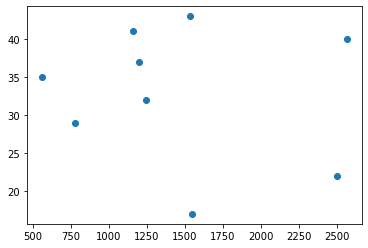

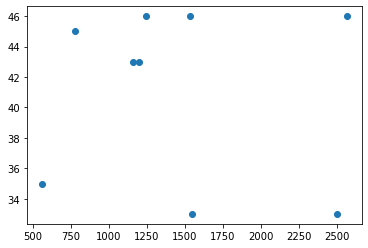

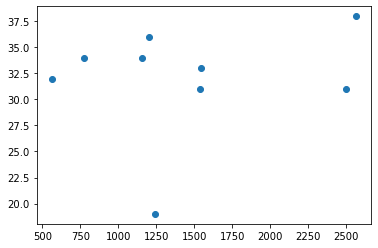

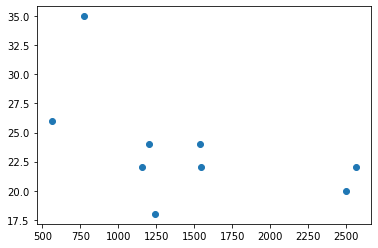

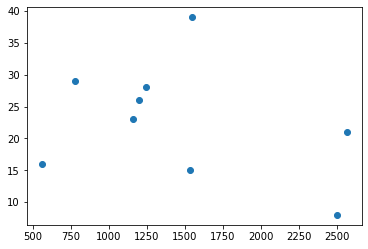

In [35]:
plt.scatter(pos_list, o_list)
plt.show()

plt.scatter(pos_list, c_list)
plt.show()

plt.scatter(pos_list, e_list)
plt.show()

plt.scatter(pos_list, a_list)
plt.show()

plt.scatter(pos_list, n_list)
plt.show()

In [36]:
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, o_list)
o_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, c_list)
c_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, e_list)
e_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, a_list)
a_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, n_list)
n_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'


print('o x pos: ',o_line)
print('c x pos: ',c_line)
print('e x pos: ',e_line)
print('a x pos: ',a_line)
print('n x pos: ',n_line)

o x pos:  Regression line: y=35.43+-0.00x, r=-0.14
c x pos:  Regression line: y=42.13+-0.00x, r=-0.08
e x pos:  Regression line: y=29.93+0.00x, r=0.18
a x pos:  Regression line: y=29.02+-0.00x, r=-0.52
n x pos:  Regression line: y=29.19+-0.00x, r=-0.33


In [37]:
pg.corr(x=df_chart['pos'], y=df_chart['O'])

n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  9 -0.135842  [-0.73, 0.58]  0.018453 -0.308729  0.727485  0.429   

            power  
pearson  0.063254

In [38]:
pg.pairwise_corr(df_chart).sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']].head()

X            Y  n         r         p-unc
70  mean_all  mean_posneg  9  0.995056  2.784247e-08
48   por_pos     mean_all  9  0.930372  2.738539e-04
49   por_pos  mean_posneg  9  0.906510  7.500005e-04
64   por_neg  mean_posneg  9 -0.877363  1.882629e-03
46   por_pos      por_neu  9 -0.857206  3.141469e-03

In [39]:
corr_pos = pg.pairwise_corr(df_chart, columns=[['pos'],['O', 'C', 'E', 'A', 'N']], method='spearman')
corr_pos

X  Y    method       tail  n         r          CI95%        r2  \
0  pos  O  spearman  two-sided  9 -0.100000   [-0.72, 0.6]  0.010000   
1  pos  C  spearman  two-sided  9  0.068399   [-0.62, 0.7]  0.004678   
2  pos  E  spearman  two-sided  9 -0.008404  [-0.67, 0.66]  0.000071   
3  pos  A  spearman  two-sided  9 -0.629930  [-0.91, 0.06]  0.396812   
4  pos  N  spearman  two-sided  9 -0.216667  [-0.77, 0.52]  0.046944   

     adj_r2         z     p-unc     power  
0 -0.320000 -0.100335  0.797972  0.056583  
1 -0.327096  0.068506  0.861202  0.052446  
2 -0.333239 -0.008404  0.982881  0.048903  
3  0.195749 -0.741300  0.069028  0.477062  
4 -0.270741 -0.220156  0.575515  0.086643

In [40]:
corr_neg = pg.pairwise_corr(df_chart, columns=[['neg'],['O', 'C', 'E', 'A', 'N']], method='spearman')
corr_neg

X  Y    method       tail  n         r          CI95%        r2  \
0  neg  O  spearman  two-sided  9  0.316667  [-0.44, 0.81]  0.100278   
1  neg  C  spearman  two-sided  9  0.410391  [-0.35, 0.84]  0.168421   
2  neg  E  spearman  two-sided  9 -0.386568  [-0.84, 0.37]  0.149435   
3  neg  A  spearman  two-sided  9 -0.434141  [-0.85, 0.32]  0.188478   
4  neg  N  spearman  two-sided  9 -0.483333  [-0.87, 0.27]  0.233611   

     adj_r2         z     p-unc     power  
0 -0.199630  0.327938  0.406397  0.134142  
1 -0.108772  0.436082  0.272585  0.201728  
2 -0.134087 -0.407759  0.304082  0.182137  
3 -0.082029 -0.464988  0.242975  0.223046  
4 -0.021852 -0.527325  0.187470  0.273270

In [41]:
corr_mean_pn = pg.pairwise_corr(df_chart, columns=[['mean_posneg'],['O', 'C', 'E', 'A', 'N']], method='spearman')
corr_mean_pn

X  Y    method       tail  n         r          CI95%        r2  \
0  mean_posneg  O  spearman  two-sided  9 -0.400000  [-0.84, 0.36]  0.160000   
1  mean_posneg  C  spearman  two-sided  9 -0.495890  [-0.87, 0.25]  0.245906   
2  mean_posneg  E  spearman  two-sided  9  0.285724   [-0.47, 0.8]  0.081638   
3  mean_posneg  A  spearman  two-sided  9  0.280915   [-0.47, 0.8]  0.078913   
4  mean_posneg  N  spearman  two-sided  9  0.100000   [-0.6, 0.72]  0.010000   

     adj_r2         z     p-unc     power  
0 -0.120000 -0.423649  0.286105  0.192967  
1 -0.005458 -0.543840  0.174578  0.287473  
2 -0.224482  0.293904  0.456086  0.116994  
3 -0.228116  0.288675  0.464035  0.114536  
4 -0.320000  0.100335  0.797972  0.056583

In [42]:
corr_mean_all = pg.pairwise_corr(df_chart, columns=[['mean_all'],['O', 'C', 'E', 'A', 'N']], method='spearman')
corr_mean_all

X  Y    method       tail  n         r          CI95%        r2  \
0  mean_all  O  spearman  two-sided  9 -0.383333  [-0.83, 0.38]  0.146944   
1  mean_all  C  spearman  two-sided  9 -0.487340  [-0.87, 0.26]  0.237500   
2  mean_all  E  spearman  two-sided  9  0.302532   [-0.45, 0.8]  0.091525   
3  mean_all  A  spearman  two-sided  9  0.093638  [-0.61, 0.71]  0.008768   
4  mean_all  N  spearman  two-sided  9  0.000000  [-0.66, 0.66]  0.000000   

     adj_r2         z     p-unc     power  
0 -0.137407 -0.403961  0.308495  0.179610  
1 -0.016667 -0.532565  0.183300  0.277739  
2 -0.211299  0.312304  0.428780  0.126017  
3 -0.321643  0.093913  0.810630  0.055621  
4 -0.333333  0.000000  1.000000  0.048849

In [43]:
df_chart.corr(method='spearman').round(4)

id_user     pos     neu     neg  por_pos  por_neu  por_neg  \
id_user       1.0000  0.1333 -0.2500 -0.1000   0.4667  -0.4833  -0.1167   
pos           0.1333  1.0000  0.4167  0.5000   0.4833  -0.7000  -0.0833   
neu          -0.2500  0.4167  1.0000  0.7167  -0.5333   0.2833   0.4667   
neg          -0.1000  0.5000  0.7167  1.0000  -0.3000  -0.1000   0.7833   
por_pos       0.4667  0.4833 -0.5333 -0.3000   1.0000  -0.8833  -0.6500   
por_neu      -0.4833 -0.7000  0.2833 -0.1000  -0.8833   1.0000   0.2833   
por_neg      -0.1167 -0.0833  0.4667  0.7833  -0.6500   0.2833   1.0000   
mean_all      0.1667  0.3000 -0.4500 -0.5833   0.8333  -0.5500  -0.9333   
mean_posneg   0.1667  0.0667 -0.5833 -0.7333   0.7667  -0.4167  -0.9500   
O            -0.3167 -0.1000  0.7667  0.3167  -0.6833   0.6000   0.3167   
C             0.3762  0.0684  0.6754  0.4104  -0.4446   0.2907   0.4189   
E            -0.2269 -0.0084  0.2185 -0.3866  -0.1345   0.3614  -0.5294   
A            -0.2213 -0.6299 -0.1532 -0.4341  -0.2384   0.5278  -0.2469   
N             0.1167 -0.2167 -0.3167 -0.4833   0.0000   0.1667  -0.2500   

             mean_all  mean_posneg       O       C       E       A       N  
id_user        0.1667       0.1667 -0.3167  0.3762 -0.2269 -0.2213  0.1167  
pos            0.3000       0.0667 -0.1000  0.0684 -0.0084 -0.6299 -0.2167  
neu           -0.4500      -0.5833  0.7667  0.6754  0.2185 -0.1532 -0.3167  
neg           -0.5833      -0.7333  0.3167  0.4104 -0.3866 -0.4341 -0.4833  
por_pos        0.8333       0.7667 -0.6833 -0.4446 -0.1345 -0.2384  0.0000  
por_neu       -0.5500      -0.4167  0.6000  0.2907  0.3614  0.5278  0.1667  
por_neg       -0.9333      -0.9500  0.3167  0.4189 -0.5294 -0.2469 -0.2500  
mean_all       1.0000       0.9667 -0.3833 -0.4873  0.3025  0.0936  0.0000  
mean_posneg    0.9667       1.0000 -0.4000 -0.4959  0.2857  0.2809  0.1000  
O             -0.3833      -0.4000  1.0000  0.6070  0.2353  0.1958 -0.4167  
C             -0.4873      -0.4959  0.6070  1.0000  0.0431  0.0218  0.0085  
E              0.3025       0.2857  0.2353  0.0431  1.0000  0.3734  0.2521  
A              0.0936       0.2809  0.1958  0.0218  0.3734  1.0000  0.0681  
N              0.0000       0.1000 -0.4167  0.0085  0.2521  0.0681  1.0000

In [44]:
pg.corr(df_chart['pos'], df_chart['A']).round(4)

n       r          CI95%      r2  adj_r2   p-val   BF10   power
pearson  9 -0.5227  [-0.88, 0.22]  0.2732  0.0309  0.1488  1.019  0.3198

Text(0.5, 1.0, 'Correlation matrix')

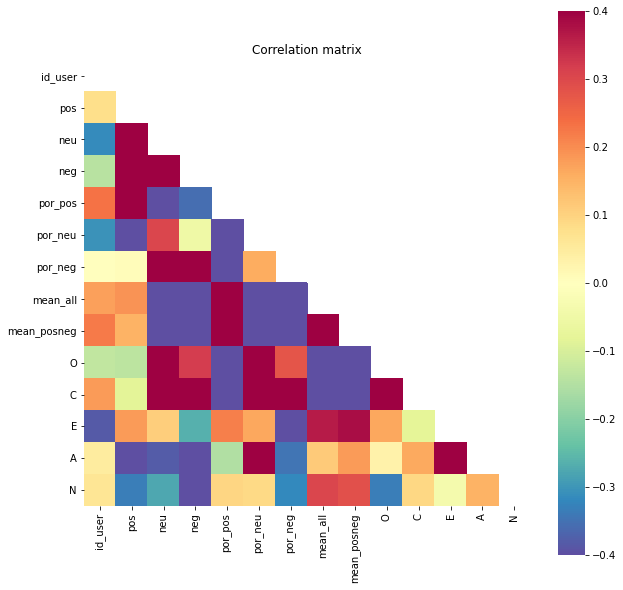

In [45]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

corrs = df_chart.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

In [46]:
df_chart.rcorr(method='spearman', upper='pval', decimals=3, padjust=None, stars=False)

id_user     pos     neu     neg por_pos por_neu por_neg mean_all  \
id_user           -   0.732   0.516   0.798   0.205   0.187   0.765    0.668   
pos           0.133       -   0.265   0.170   0.187   0.036   0.831    0.433   
neu           -0.25   0.417       -    0.03   0.139   0.460   0.205    0.224   
neg            -0.1     0.5   0.717       -   0.433   0.798   0.013    0.099   
por_pos       0.467   0.483  -0.533    -0.3       -   0.002   0.058    0.005   
por_neu      -0.483    -0.7   0.283    -0.1  -0.883       -   0.460    0.125   
por_neg      -0.117  -0.083   0.467   0.783   -0.65   0.283       -    0.000   
mean_all      0.167     0.3   -0.45  -0.583   0.833   -0.55  -0.933        -   
mean_posneg   0.167   0.067  -0.583  -0.733   0.767  -0.417   -0.95    0.967   
O            -0.317    -0.1   0.767   0.317  -0.683     0.6   0.317   -0.383   
C             0.376   0.068   0.675    0.41  -0.445   0.291   0.419   -0.487   
E            -0.227  -0.008   0.218  -0.387  -0.134   0.361  -0.529    0.303   
A            -0.221   -0.63  -0.153  -0.434  -0.238   0.528  -0.247    0.094   
N             0.117  -0.217  -0.317  -0.483     0.0   0.167   -0.25      0.0   

            mean_posneg       O      C      E      A      N  
id_user           0.668   0.406  0.318  0.557  0.567  0.765  
pos               0.865   0.798  0.861  0.983  0.069  0.576  
neu               0.099   0.016  0.046  0.572  0.694  0.406  
neg               0.025   0.406  0.273  0.304  0.243  0.187  
por_pos           0.016   0.042  0.231  0.730  0.537     1.  
por_neu           0.265   0.088  0.448  0.339  0.144  0.668  
por_neg           0.000   0.406  0.262  0.143  0.522  0.516  
mean_all          0.000   0.308  0.183  0.429  0.811     1.  
mean_posneg           -   0.286  0.175  0.456  0.464  0.798  
O                  -0.4       -  0.083  0.542  0.614  0.265  
C                -0.496   0.607      -  0.912  0.956  0.983  
E                 0.286   0.235  0.043      -  0.322  0.513  
A                 0.281   0.196  0.022  0.373      -  0.862  
N                   0.1  -0.417  0.009  0.252  0.068      -

In [47]:
pg.homoscedasticity(df_chart)

W      pval  equal_var
levene  0.427649  0.902442       True

In [48]:
pg.normality(df_chart)

W      pval  normal
id_user      0.937227  0.553027    True
pos          0.898911  0.245757    True
neu          0.909002  0.308954    True
neg          0.891281  0.205660    True
por_pos      0.894036  0.219422    True
por_neu      0.957068  0.767189    True
por_neg      0.952312  0.715451    True
mean_all     0.902974  0.269745    True
mean_posneg  0.911672  0.327755    True
O            0.928189  0.464295    True
C            0.771159  0.009526   False
E            0.796157  0.018457   False
A            0.836386  0.052640    True
N            0.984958  0.984873    True

In [49]:
df_chart

id_user   pos   neu   neg    por_pos    por_neu    por_neg  mean_all  \
0        26  1200  2476  1363  23.814249  49.136733  27.049018 -0.016055   
1        27  1158  2406   985  25.456144  52.890745  21.653111  0.004249   
2        28  1538  2742  1653  25.922805  46.216080  27.861116 -0.015823   
4        30  1547  1084   541  48.770492  34.174023  17.055485  0.111872   
5        31  2501  1948  1547  41.711141  32.488326  25.800534  0.039641   
8        34   562   664   319  36.375405  42.977346  20.647249  0.051674   
9        35   777  1262   556  29.942197  48.631985  21.425819  0.034614   
11       37  2566  2596  1294  39.745973  40.210657  20.043371  0.052329   
12       38  1243  1981  1484  26.401869  42.077315  31.520816 -0.020748   

    mean_posneg   O   C   E   A   N  
0     -0.031565  37  43  36  24  26  
1      0.009018  41  43  34  22  23  
2     -0.029420  43  46  31  24  15  
4      0.169951  17  33  33  22  39  
5      0.058718  22  33  31  20   8  
8      0.090621  35  35  32  26  16  
9      0.067384  29  45  34  35  29  
11     0.087523  40  46  38  22  21  
12    -0.035820  32  46  19  18  28

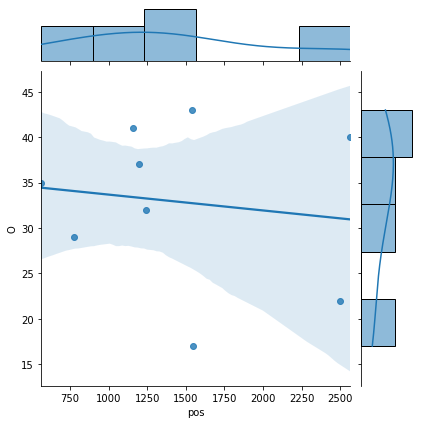

In [50]:
sns.jointplot(data=df_chart, x='pos', y='O', kind='reg')

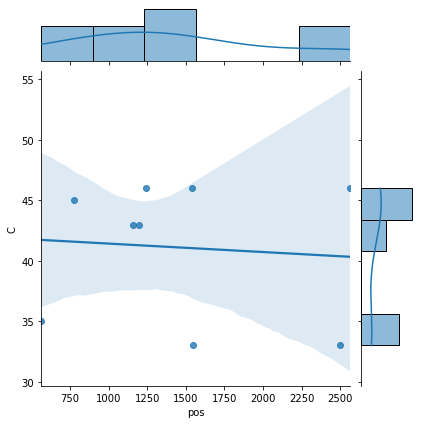

In [51]:
sns.jointplot(data=df_chart, x='pos', y='C', kind='reg')

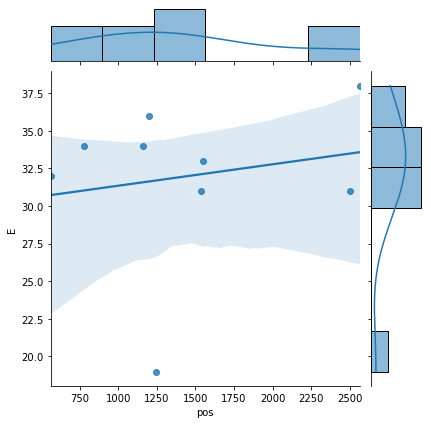

In [52]:
sns.jointplot(data=df_chart, x='pos', y='E', kind='reg')

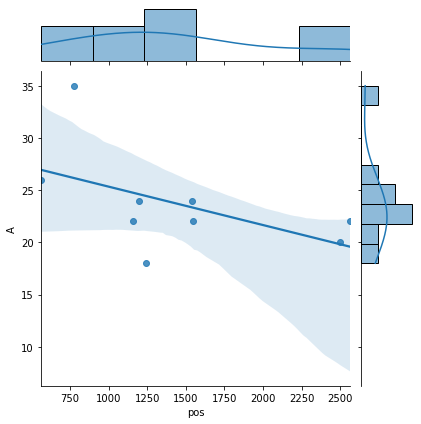

In [53]:
sns.jointplot(data=df_chart, x='pos', y='A', kind='reg')

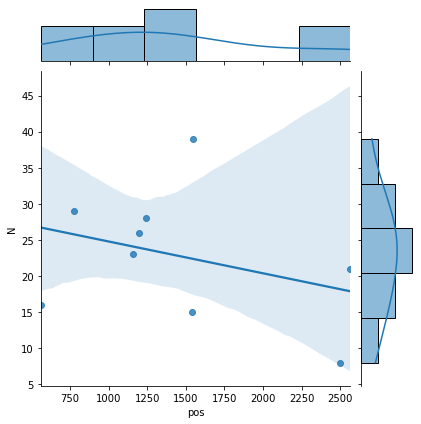

In [54]:
sns.jointplot(data=df_chart, x='pos', y='N', kind='reg')

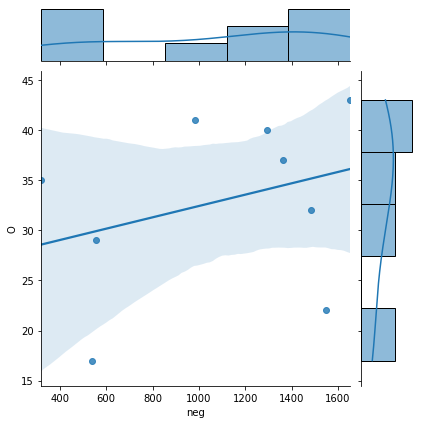

In [55]:
sns.jointplot(data=df_chart, x='neg', y='O', kind='reg')

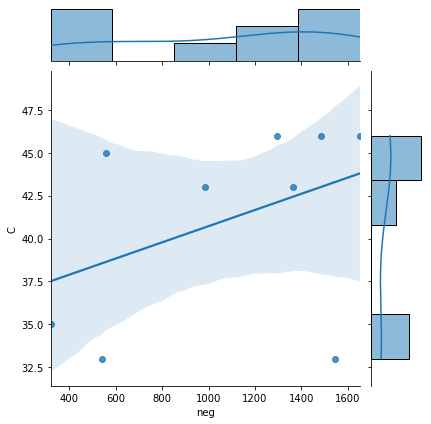

In [56]:
sns.jointplot(data=df_chart, x='neg', y='C', kind='reg')

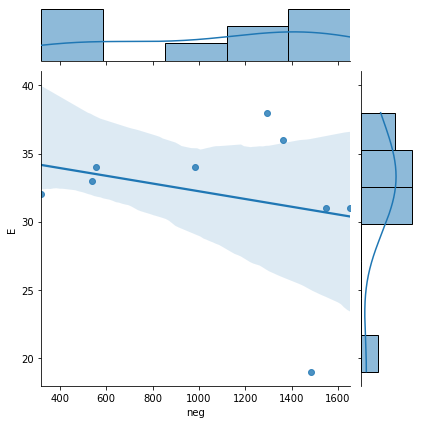

In [57]:
sns.jointplot(data=df_chart, x='neg', y='E', kind='reg')

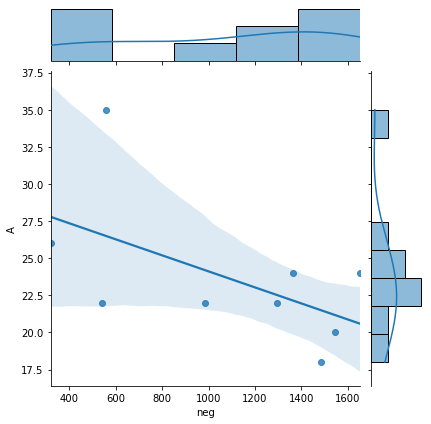

In [58]:
sns.jointplot(data=df_chart, x='neg', y='A', kind='reg')

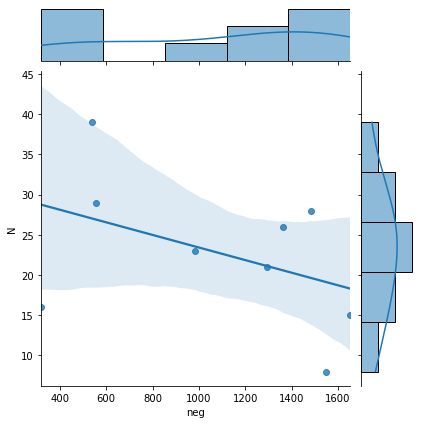

In [59]:
sns.jointplot(data=df_chart, x='neg', y='N', kind='reg')

In [60]:
print(pg.mwu(df_chart['pos'], df_chart['O']))
print(pg.mwu(df_chart['neg'], df_chart['O']))

     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000412 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000412 -1.0   1.0


In [61]:
print(pg.mwu(df_chart['pos'], df_chart['C']))
print(pg.mwu(df_chart['neg'], df_chart['C']))

     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000395 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000395 -1.0   1.0


In [62]:
print(pg.mwu(df_chart['pos'], df_chart['E']))
print(pg.mwu(df_chart['neg'], df_chart['E']))

     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000407 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000407 -1.0   1.0


In [63]:
print(pg.mwu(df_chart['pos'], df_chart['A']))
print(pg.mwu(df_chart['neg'], df_chart['A']))

     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000398 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000398 -1.0   1.0


In [64]:
print(pg.mwu(df_chart['pos'], df_chart['N']))
print(pg.mwu(df_chart['neg'], df_chart['N']))

     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000412 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000412 -1.0   1.0


In [65]:
print(pg.kruskal(data=df_chart, dv='pos', between='O'))
print(pg.kruskal(data=df_chart, dv='neg', between='O'))

        Source  ddof1    H    p-unc
Kruskal      O      8  8.0  0.43347
        Source  ddof1    H    p-unc
Kruskal      O      8  8.0  0.43347


In [66]:
print(pg.kruskal(data=df_chart, dv='pos', between='C'))
print(pg.kruskal(data=df_chart, dv='neg', between='C'))

        Source  ddof1         H     p-unc
Kruskal      C      4  6.711111  0.151965
        Source  ddof1         H     p-unc
Kruskal      C      4  4.266667  0.371118


In [67]:
print(pg.kruskal(data=df_chart, dv='pos', between='E'))
print(pg.kruskal(data=df_chart, dv='neg', between='E'))

        Source  ddof1         H     p-unc
Kruskal      E      6  7.666667  0.263555
        Source  ddof1         H     p-unc
Kruskal      E      6  7.866667  0.248035


In [68]:
print(pg.kruskal(data=df_chart, dv='pos', between='A'))
print(pg.kruskal(data=df_chart, dv='neg', between='A'))

        Source  ddof1         H     p-unc
Kruskal      A      5  5.244444  0.386782
        Source  ddof1         H     p-unc
Kruskal      A      5  6.777778  0.237699


In [69]:
print(pg.kruskal(data=df_chart, dv='pos', between='N'))
print(pg.kruskal(data=df_chart, dv='neg', between='N'))

        Source  ddof1    H    p-unc
Kruskal      N      8  8.0  0.43347
        Source  ddof1    H    p-unc
Kruskal      N      8  8.0  0.43347
